C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


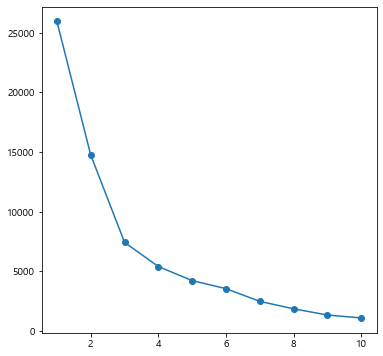

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


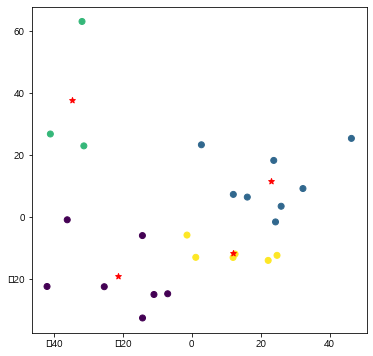

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

plt.rc('font', family='Malgun Gothic')

#### 데이터 불러오기 ####
# 인덱스를 국가로 하여 데이터 불러오기
df = pd.read_csv('./Data/2019_외래관광객_주요참여활동.csv', index_col='국가')
df = df.drop(index='전체', axis=0) # 전체 행은 삭제

#### 차원 축소 ####
pca = PCA(n_components=2) # PCA 생성
pca_tr = pca.fit_transform(df) # 학습과 변환

df['pca_x'] = pca_tr[:,0] # DataFrame 추가
df['pca_y'] = pca_tr[:,1] # DataFrame 추가

#### 군집 개수 확인 ####
inertias = [] # 응집도 추가할 빈 배열
for i in range(1, 11):
    test = KMeans(n_clusters=i)
    test.fit(df[['pca_x', 'pca_y']])
    inertias.append(test.inertia_)

#### 군집 개수 시각화 ####
plt.figure(figsize=(6,6))
plt.plot(range(1, 11), inertias, '-o')


#### 군집 ####
model = KMeans(n_clusters=4, init='k-means++')
model.fit(df[['pca_x', 'pca_y']])
center = model.cluster_centers_
df['cluster'] = model.labels_


#### 군집 시각화 ####
plt.figure(figsize=(6,6))
plt.scatter(df['pca_x'], df['pca_y'], c=df['cluster'])
plt.scatter(center[:,0], center[:,1], c='r', marker='*')

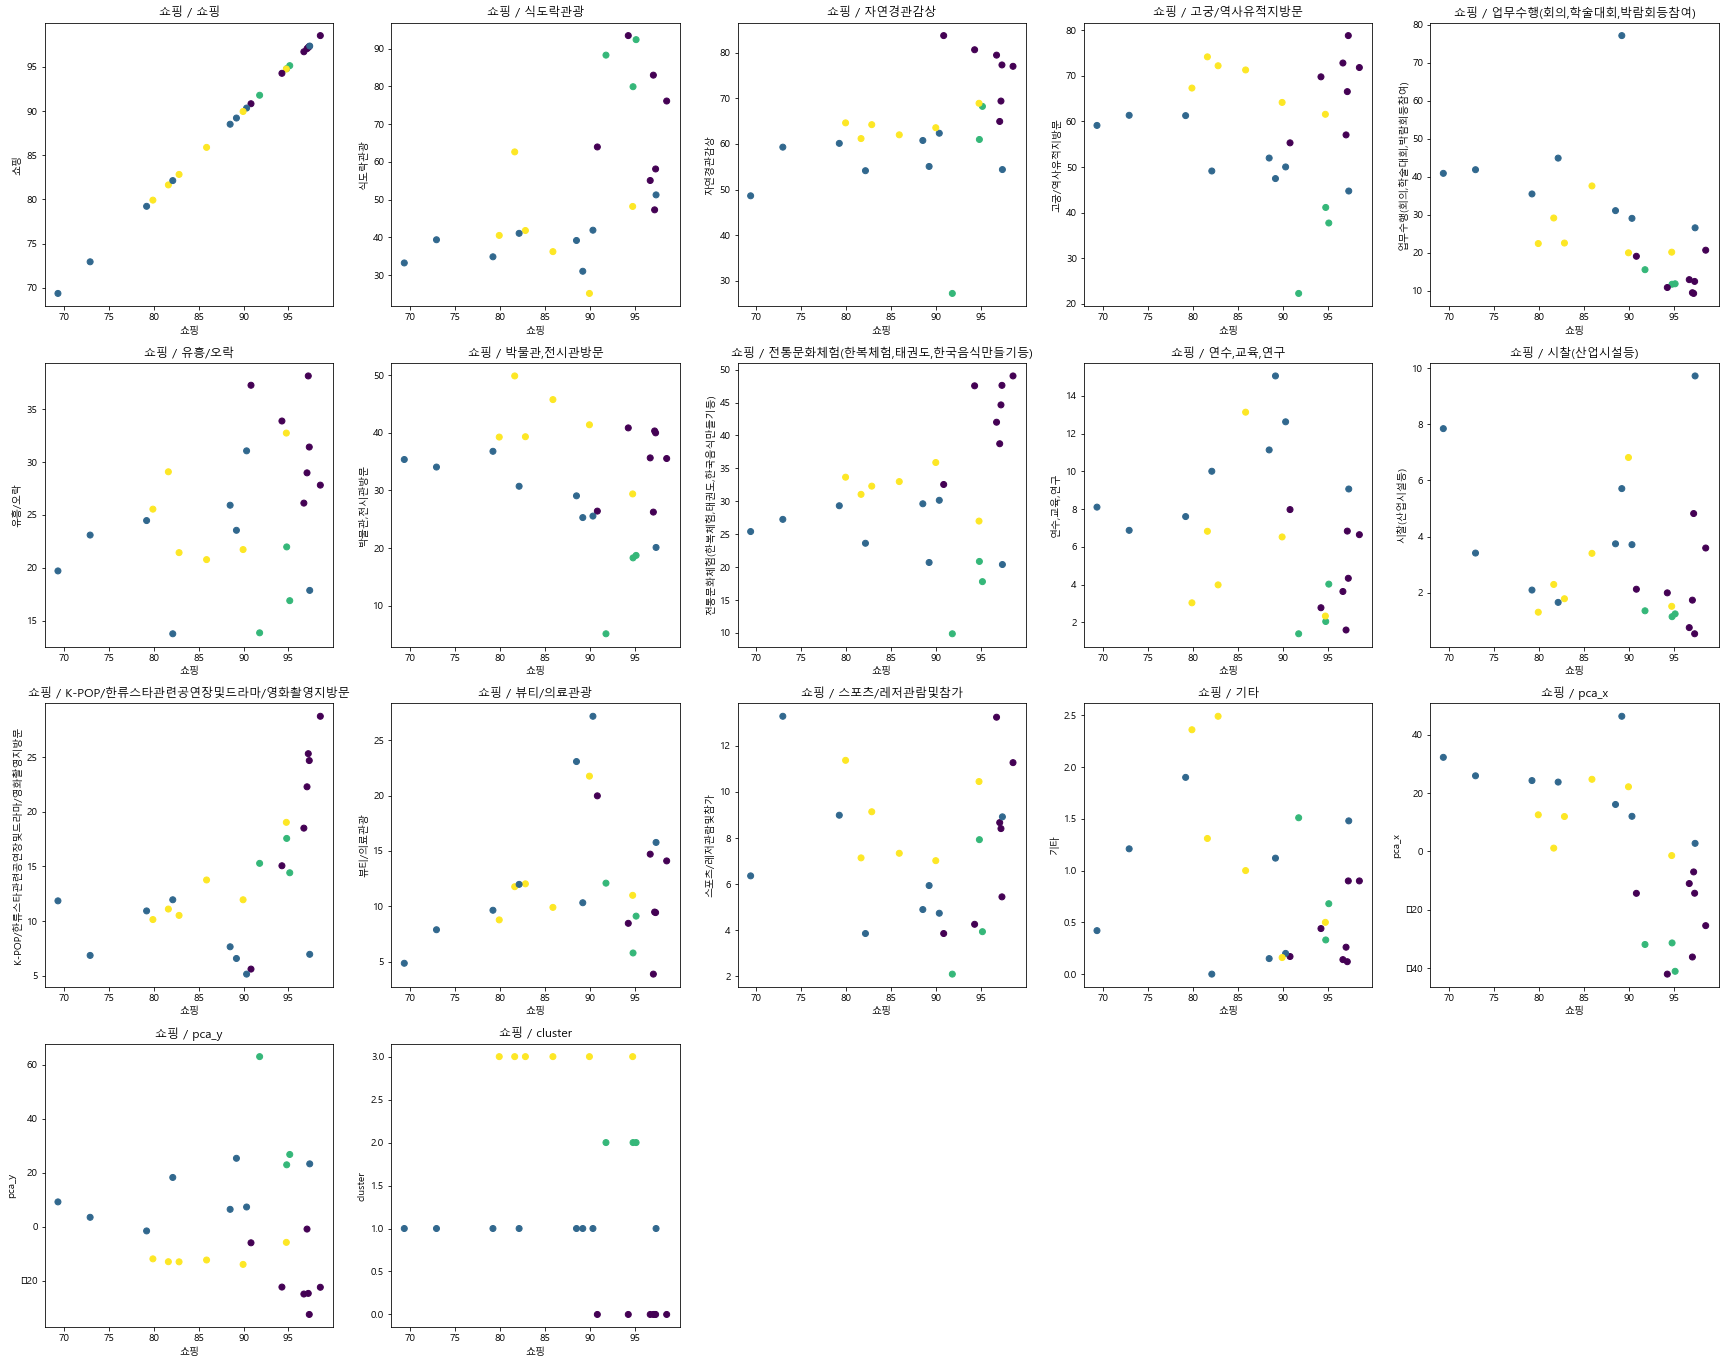

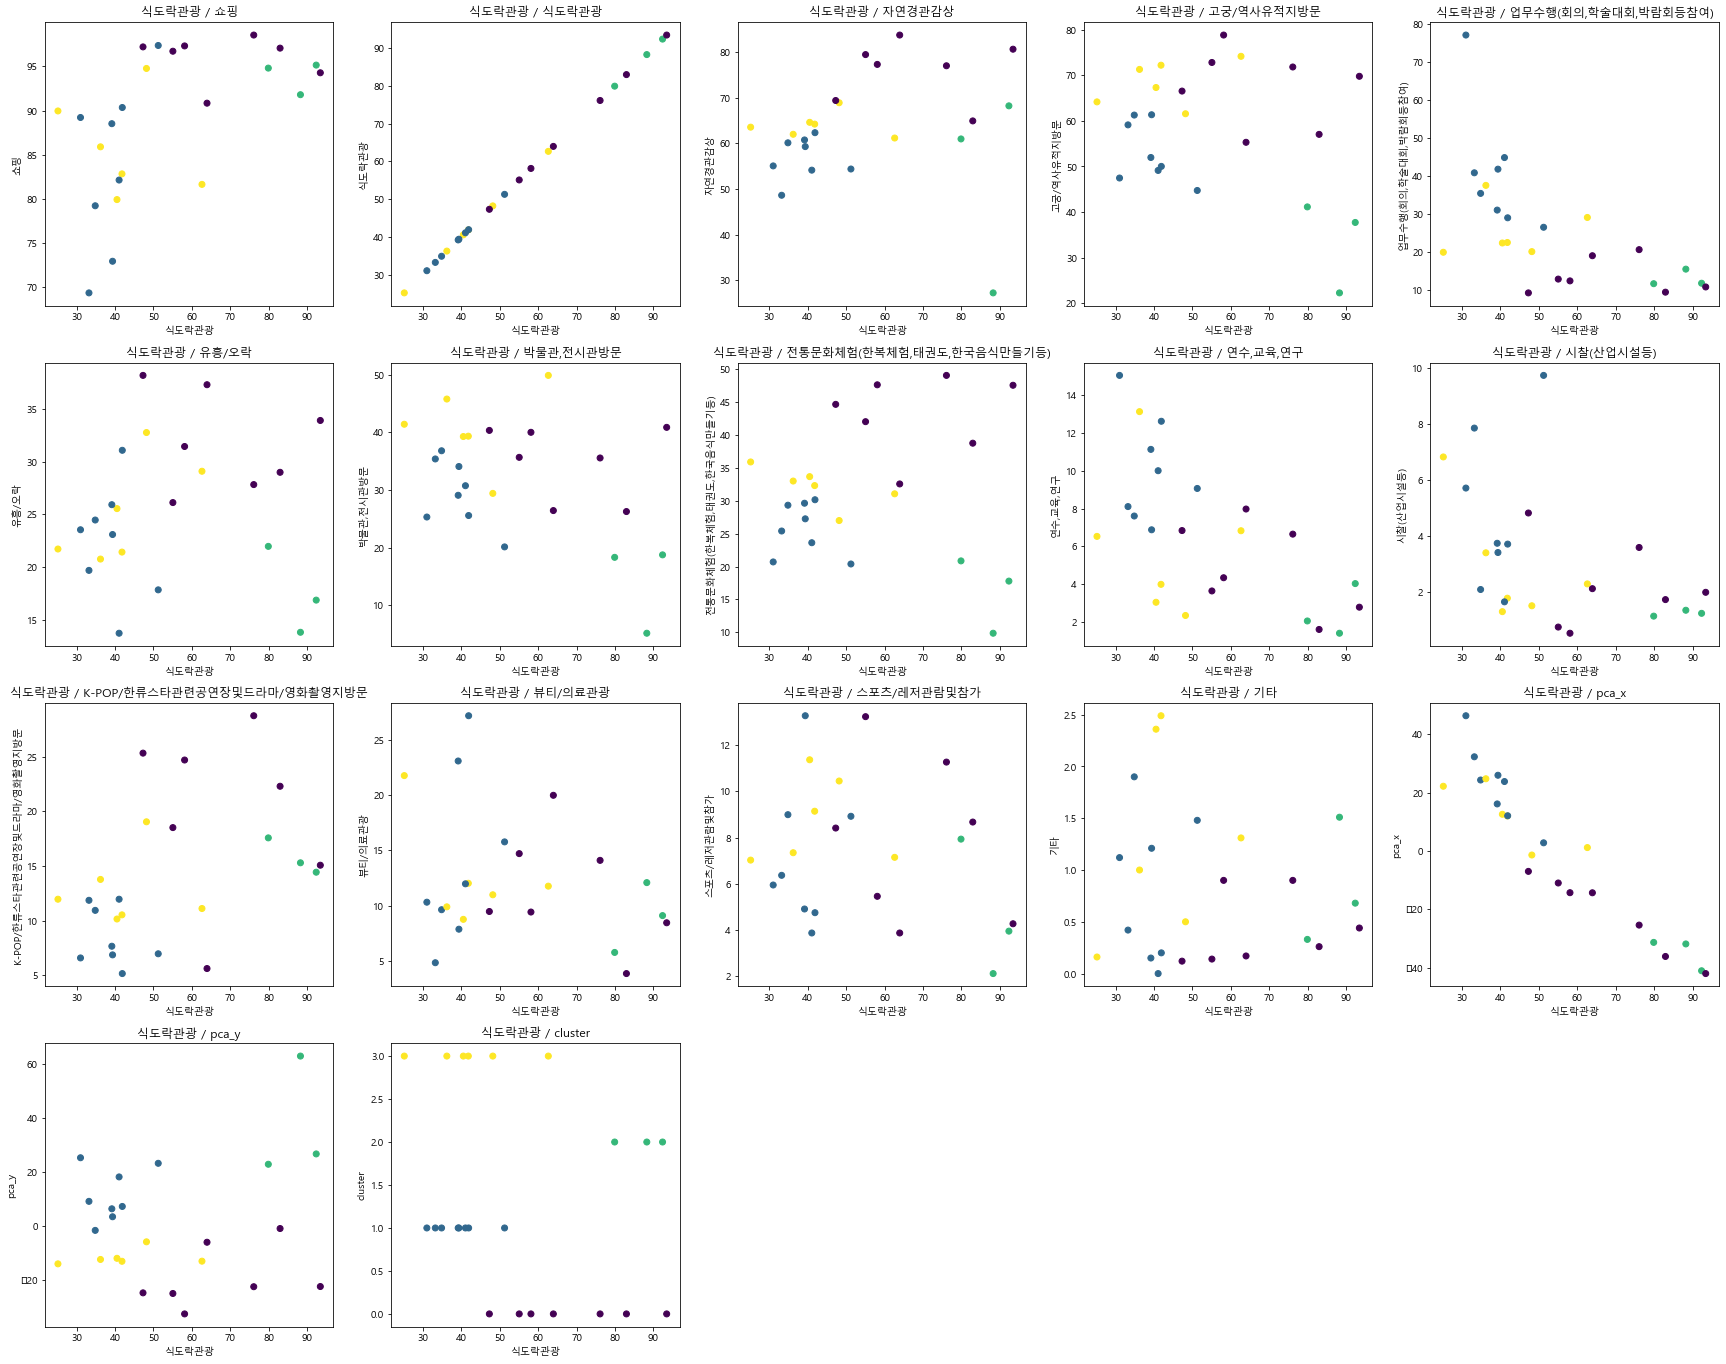

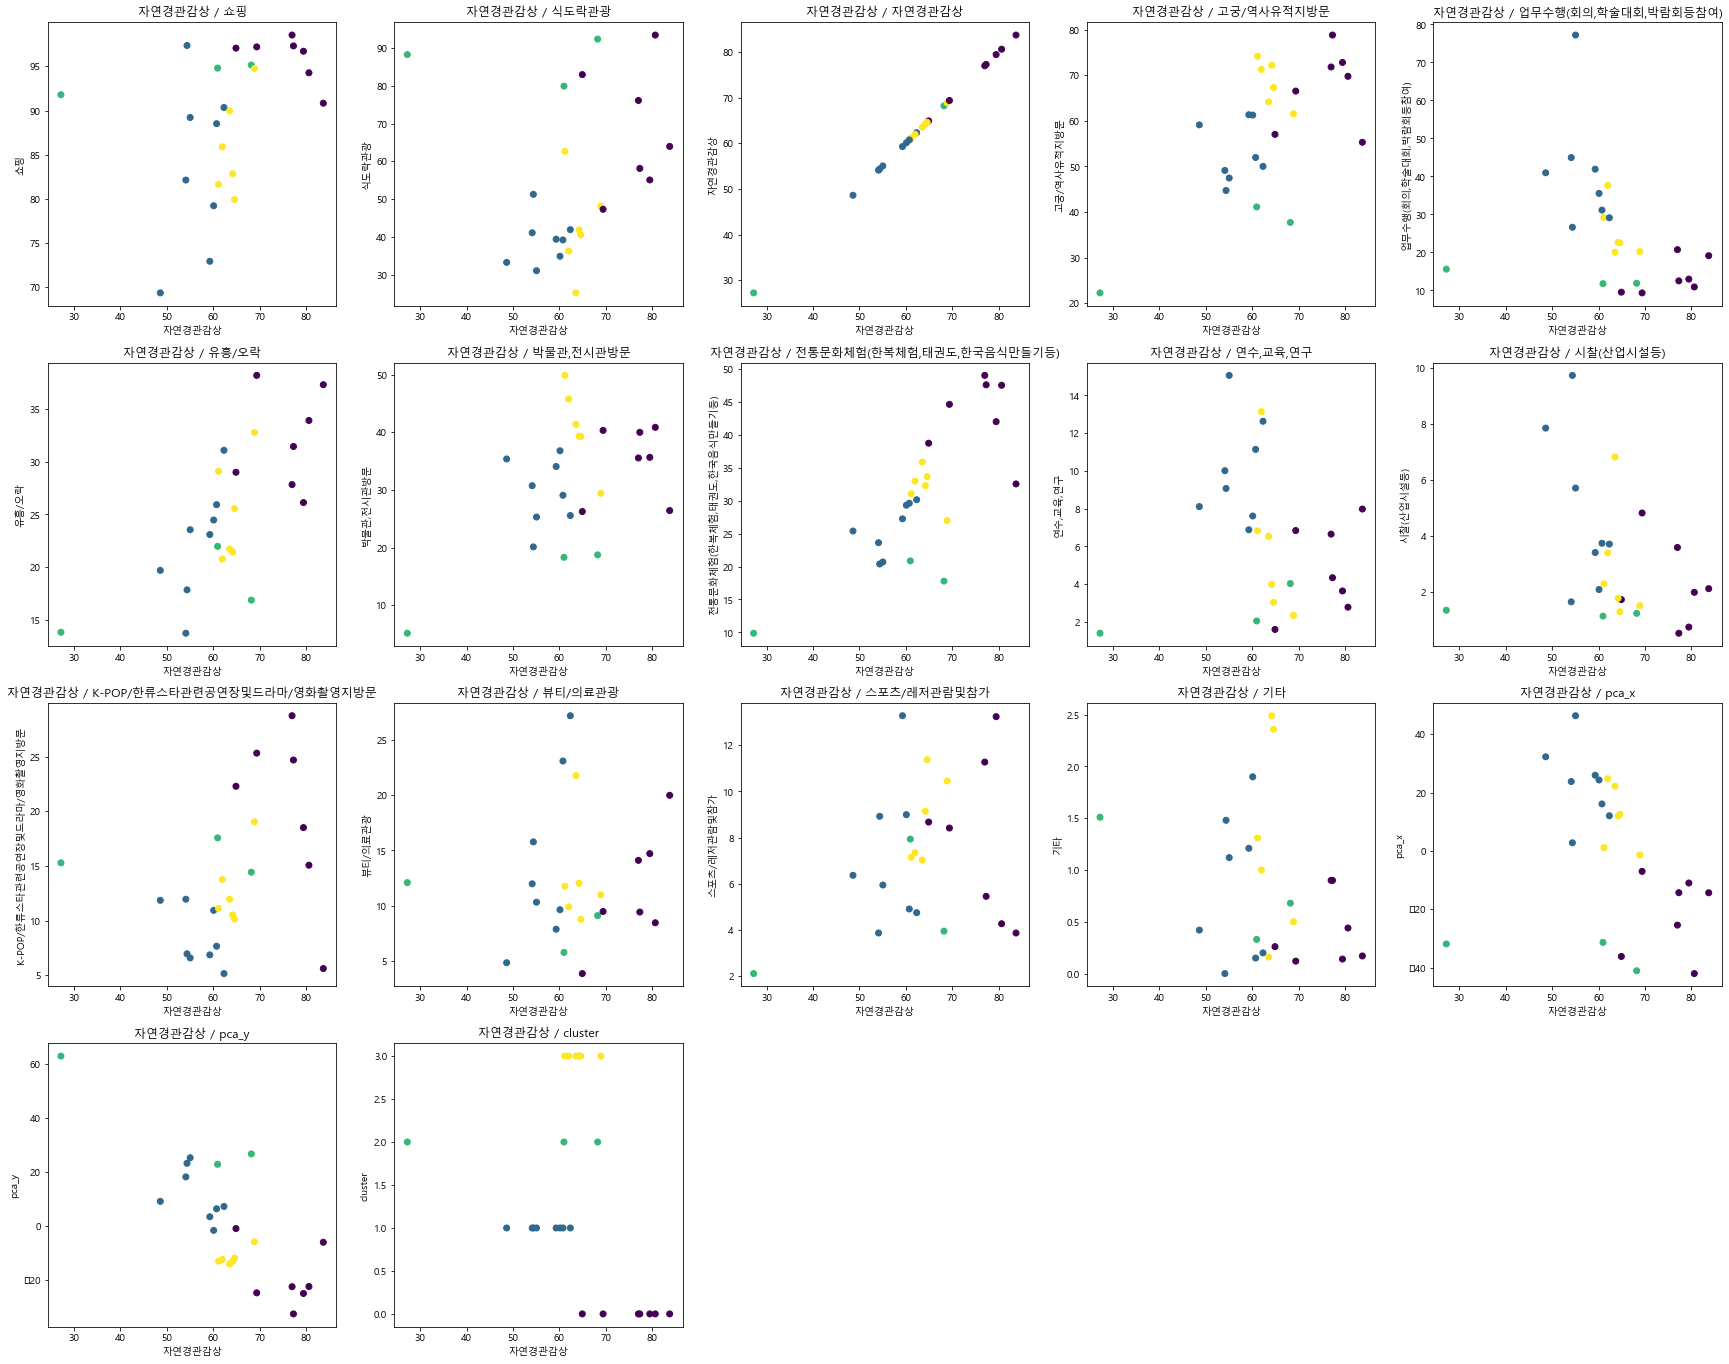

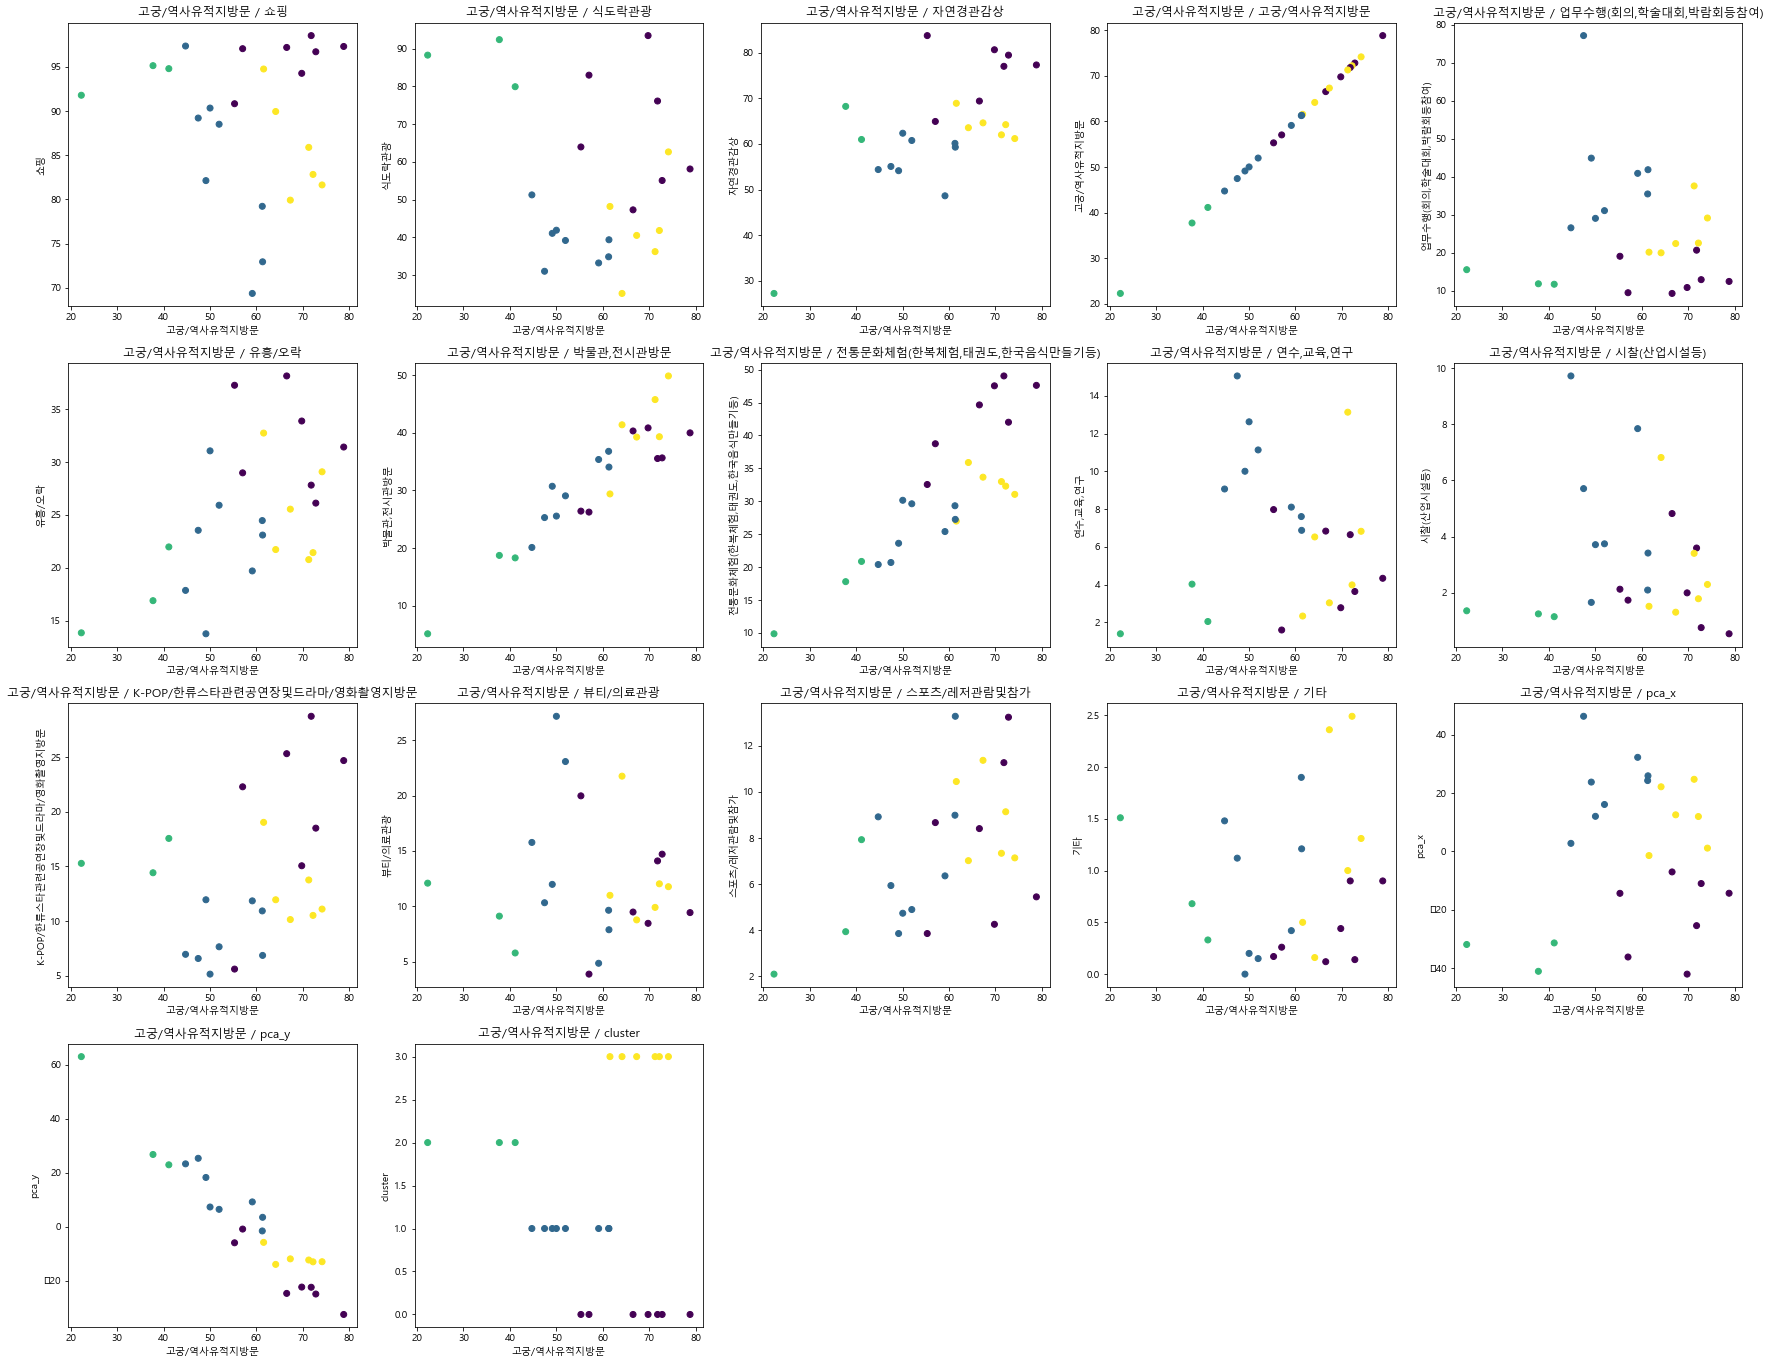

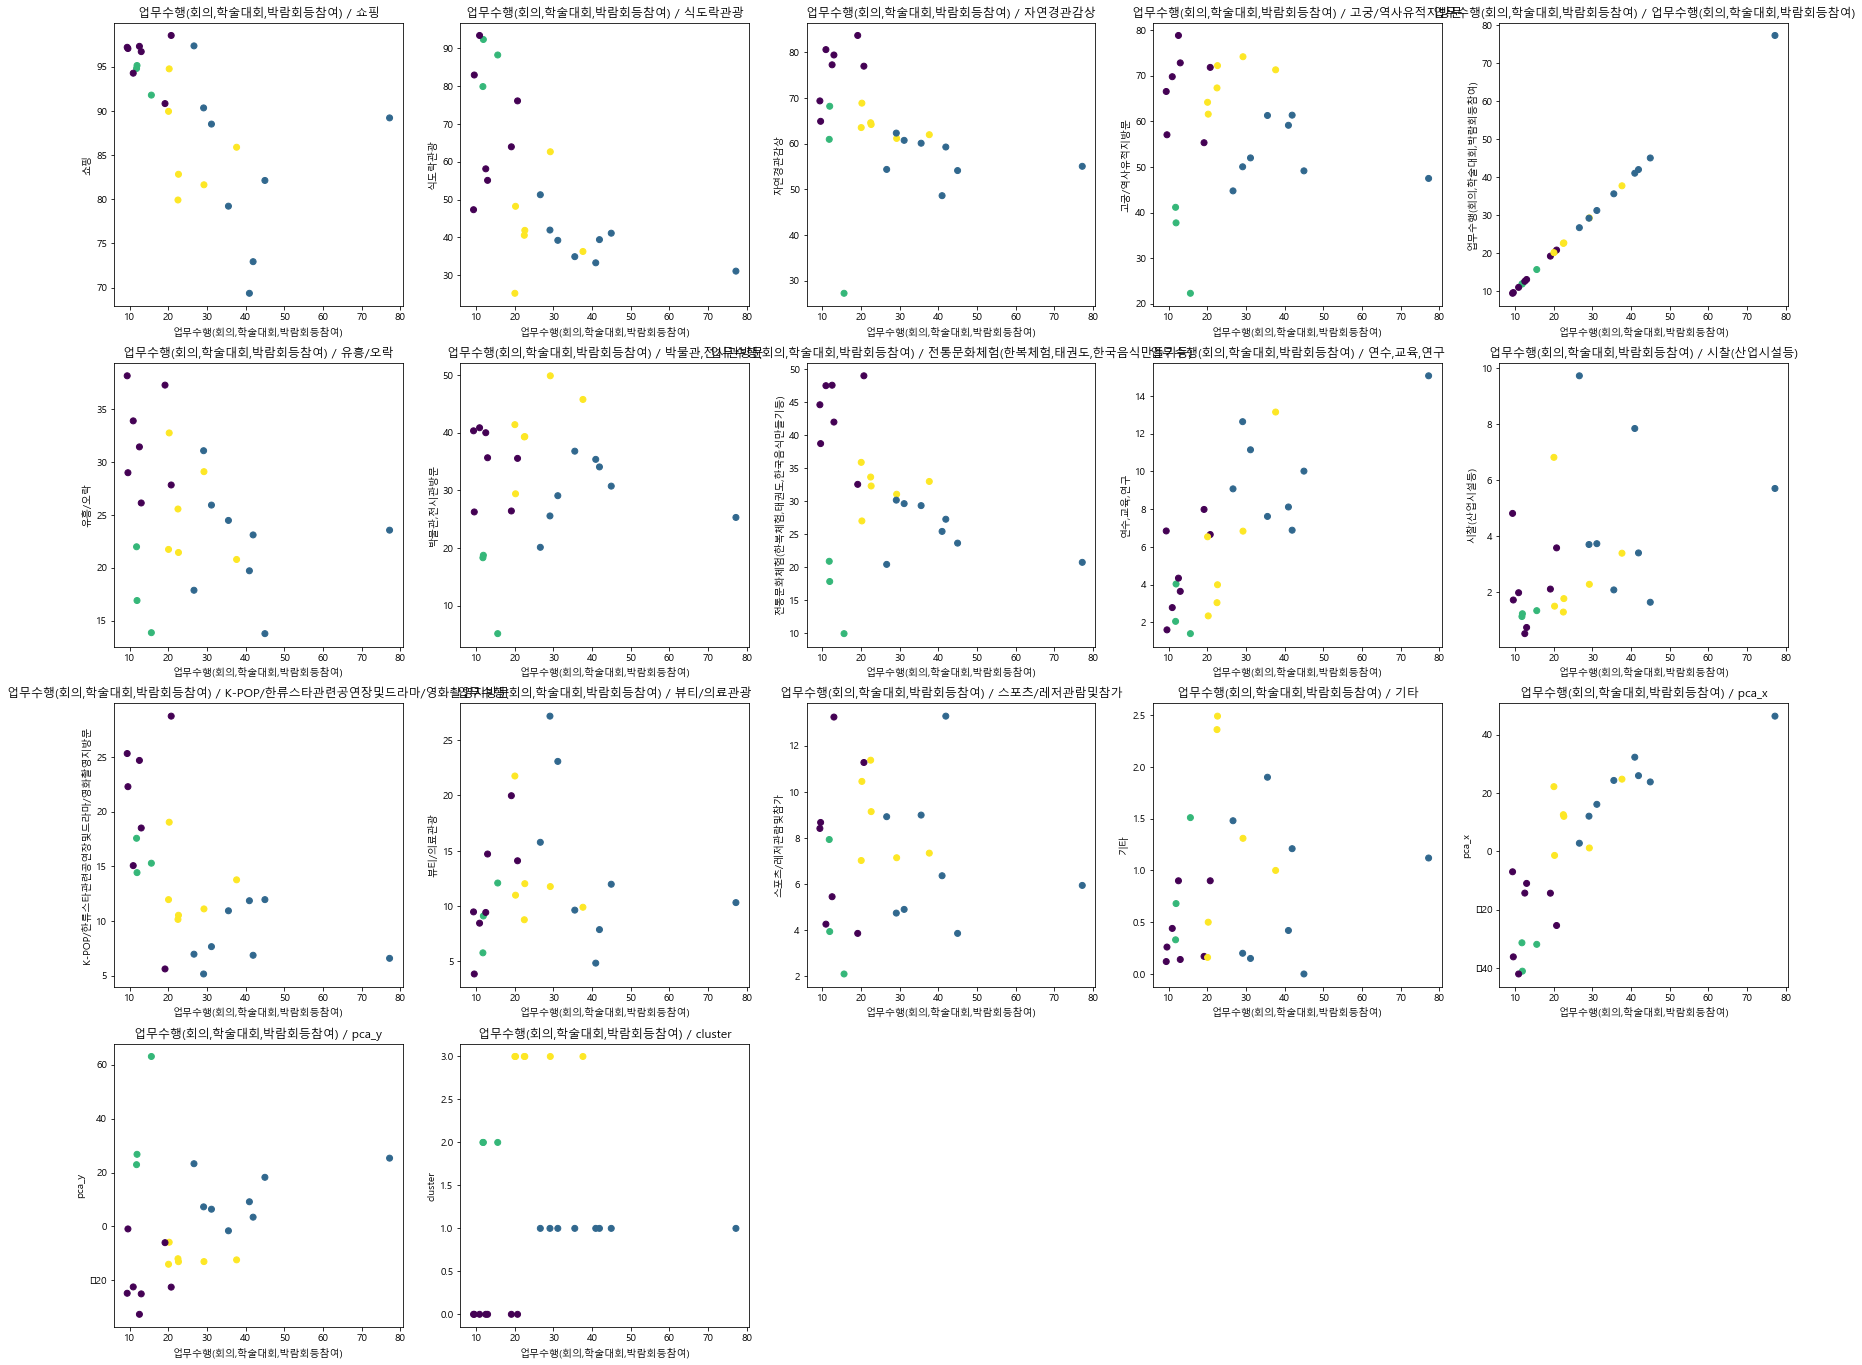

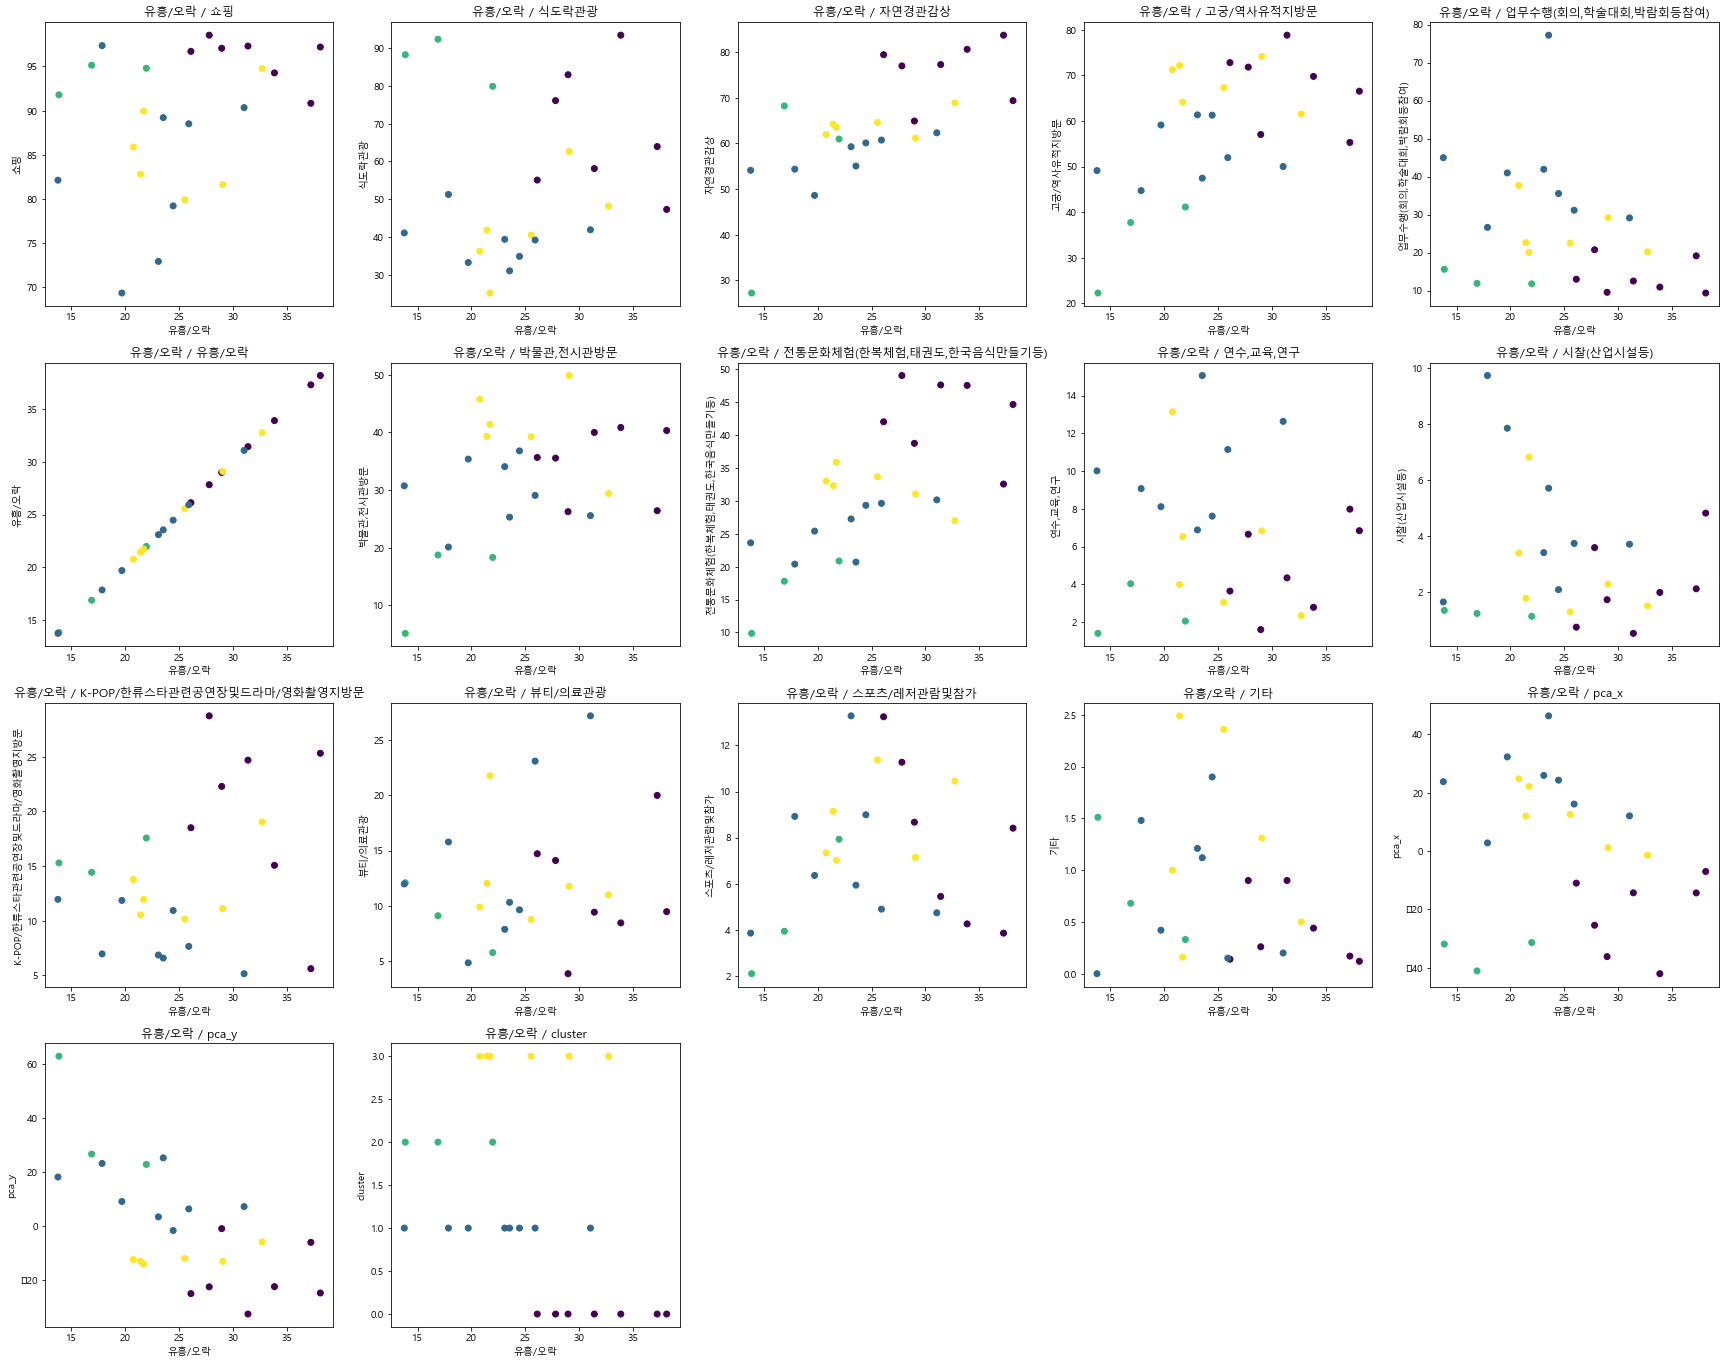

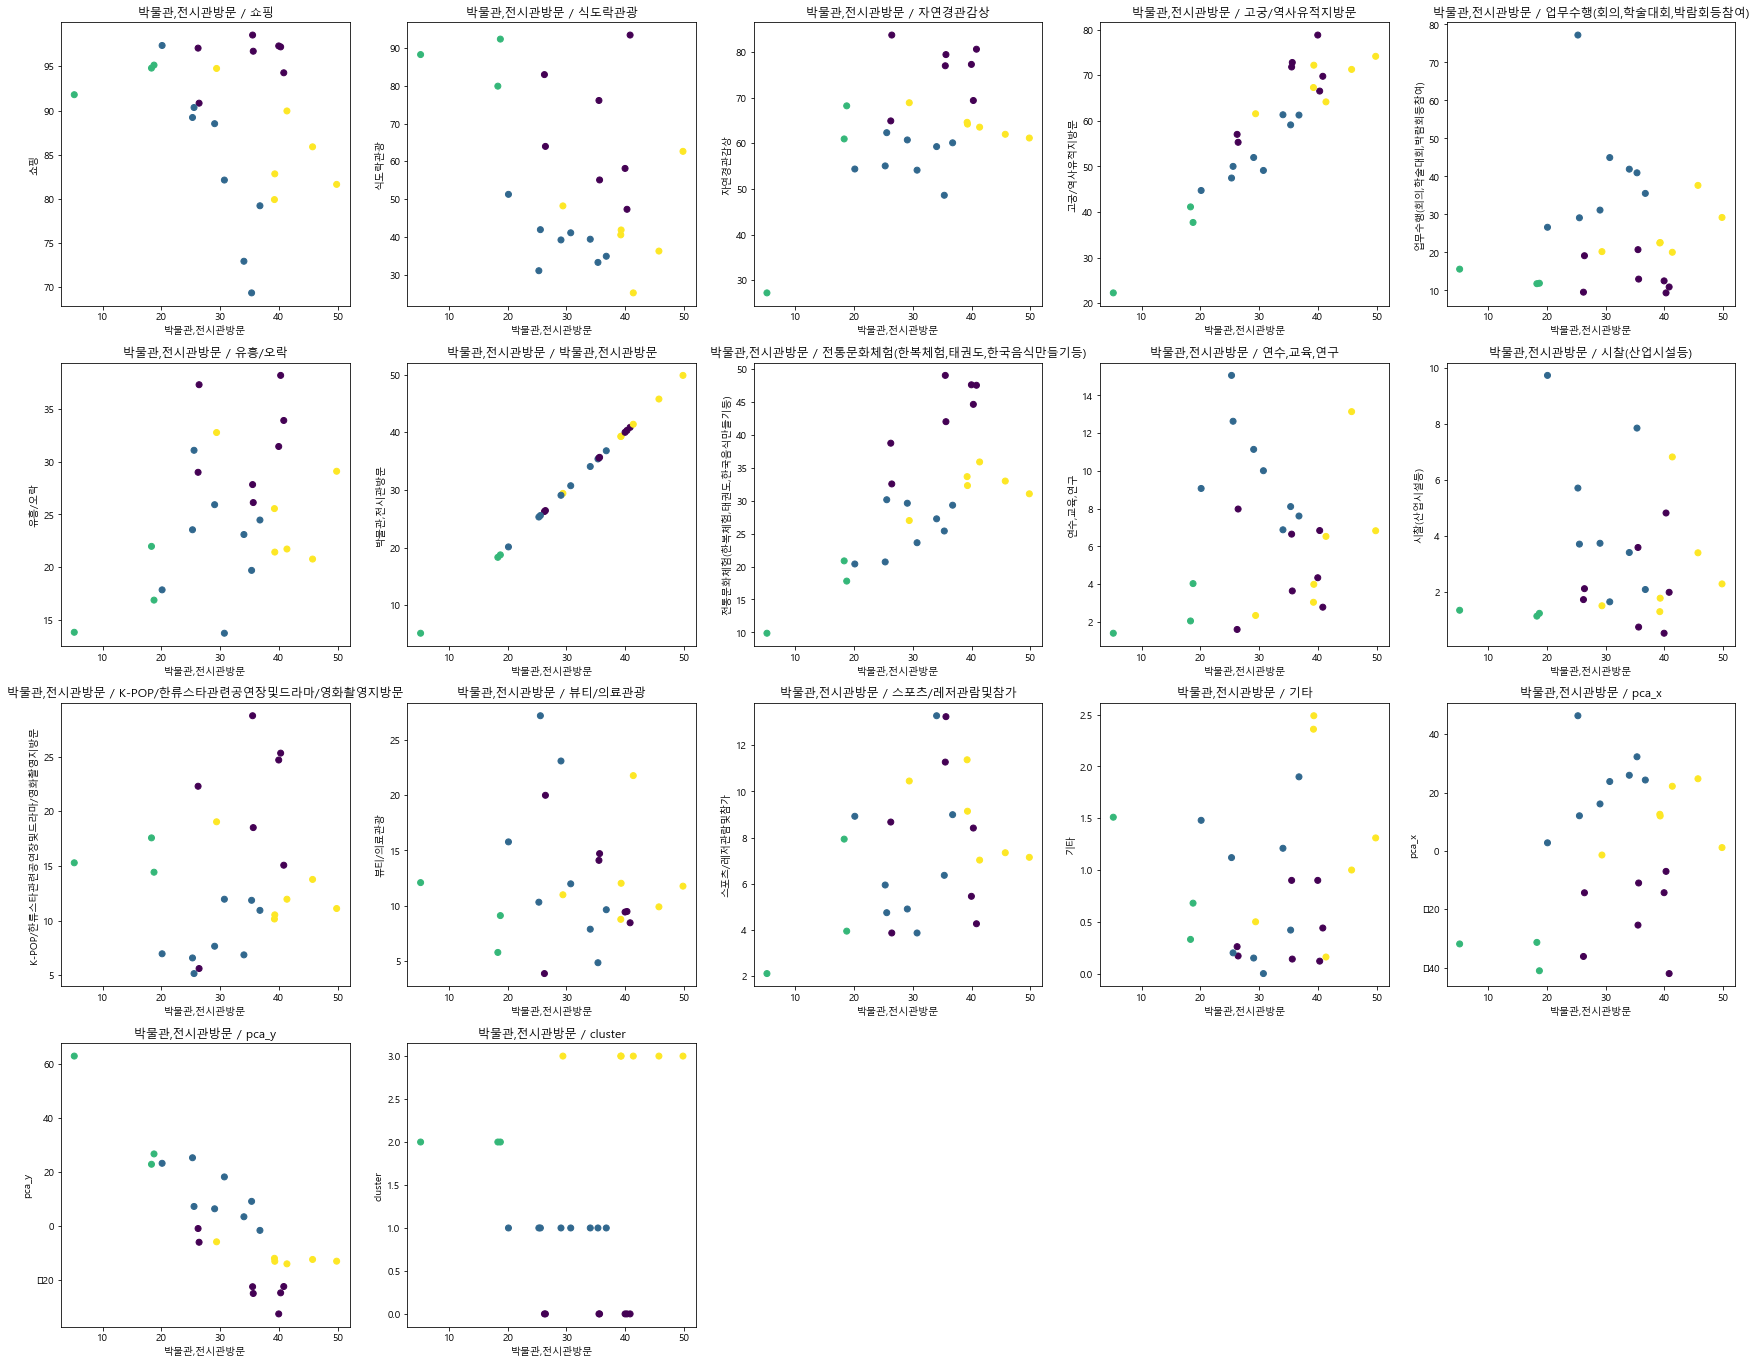

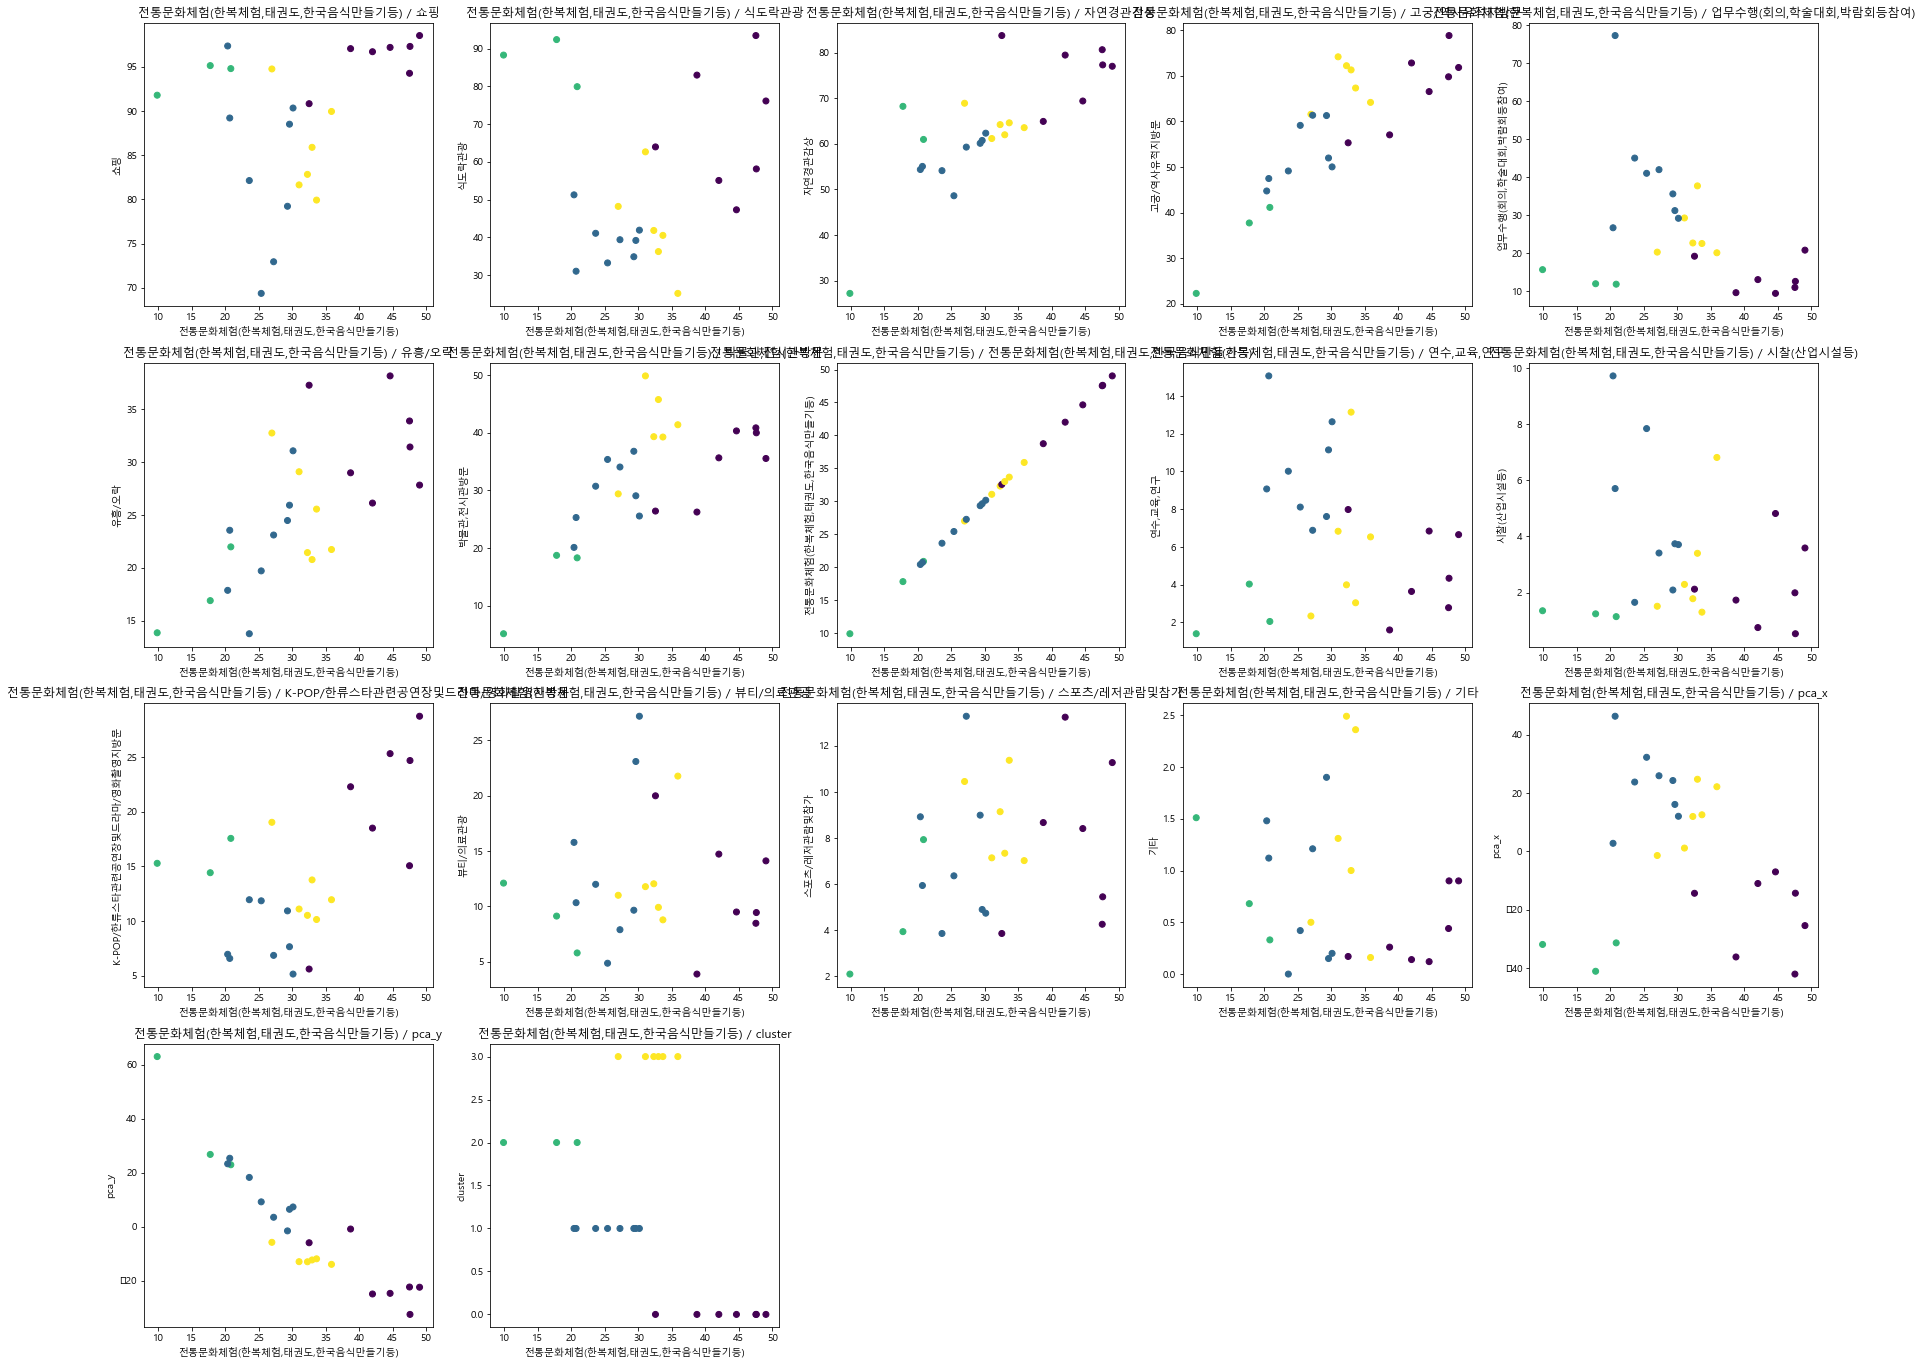

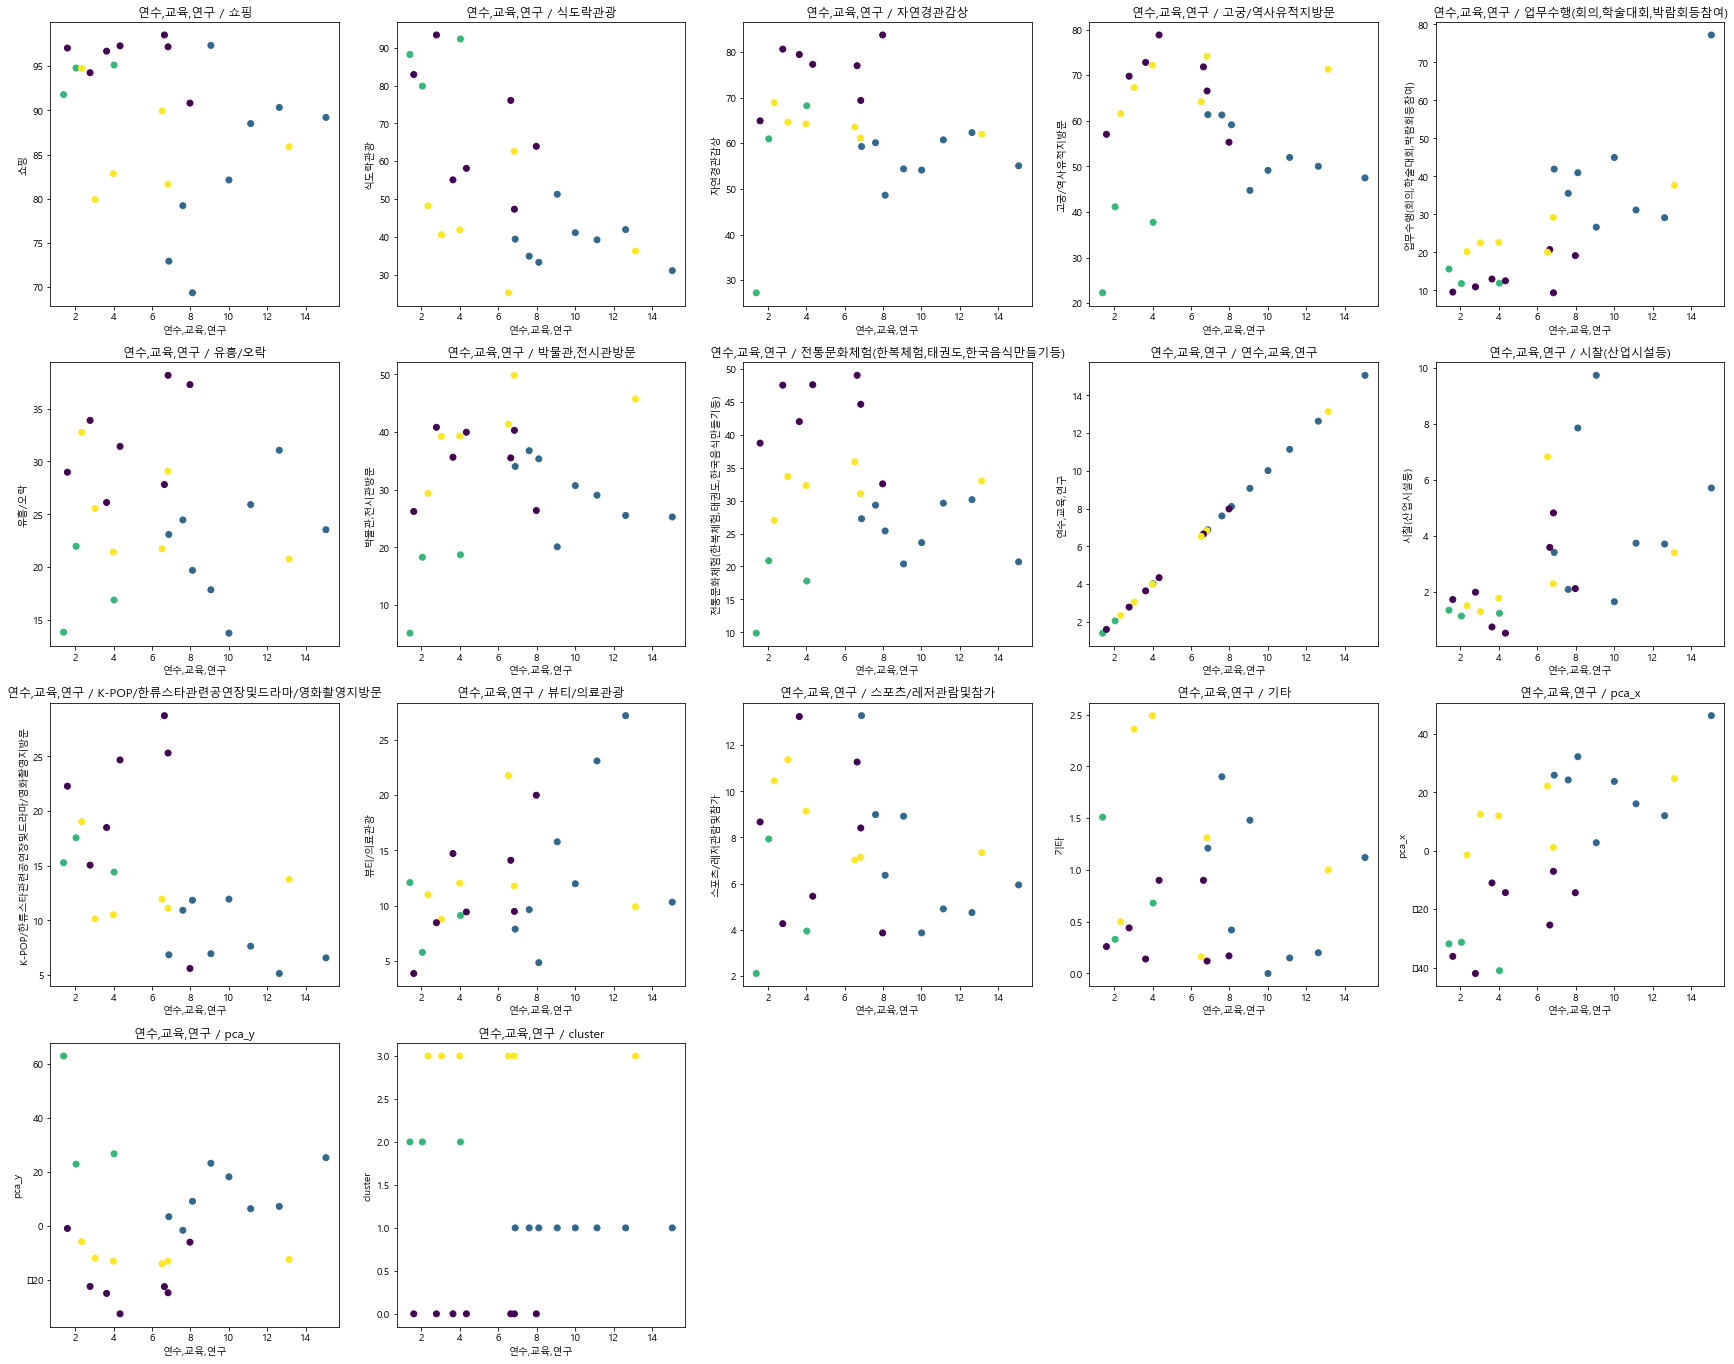

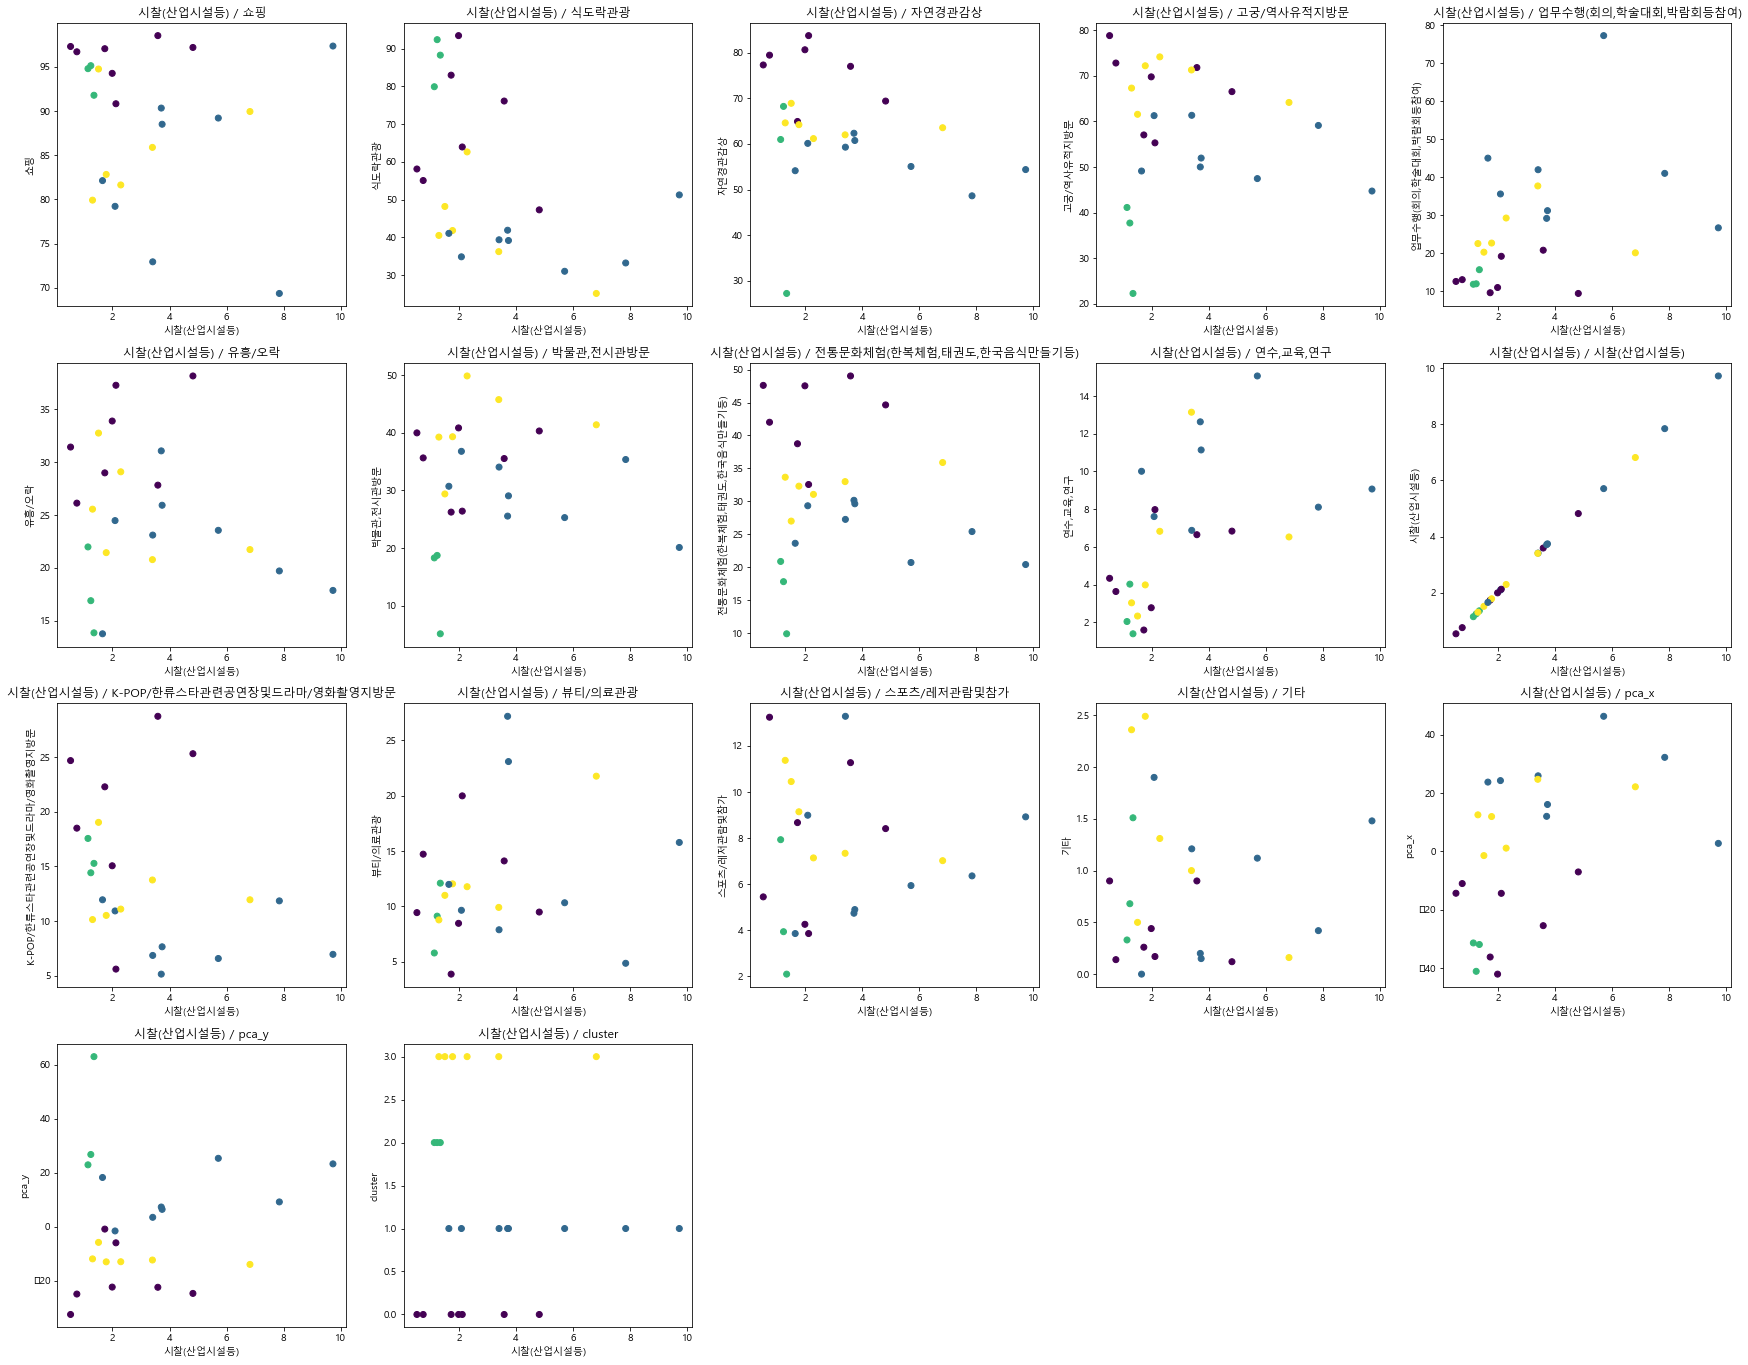

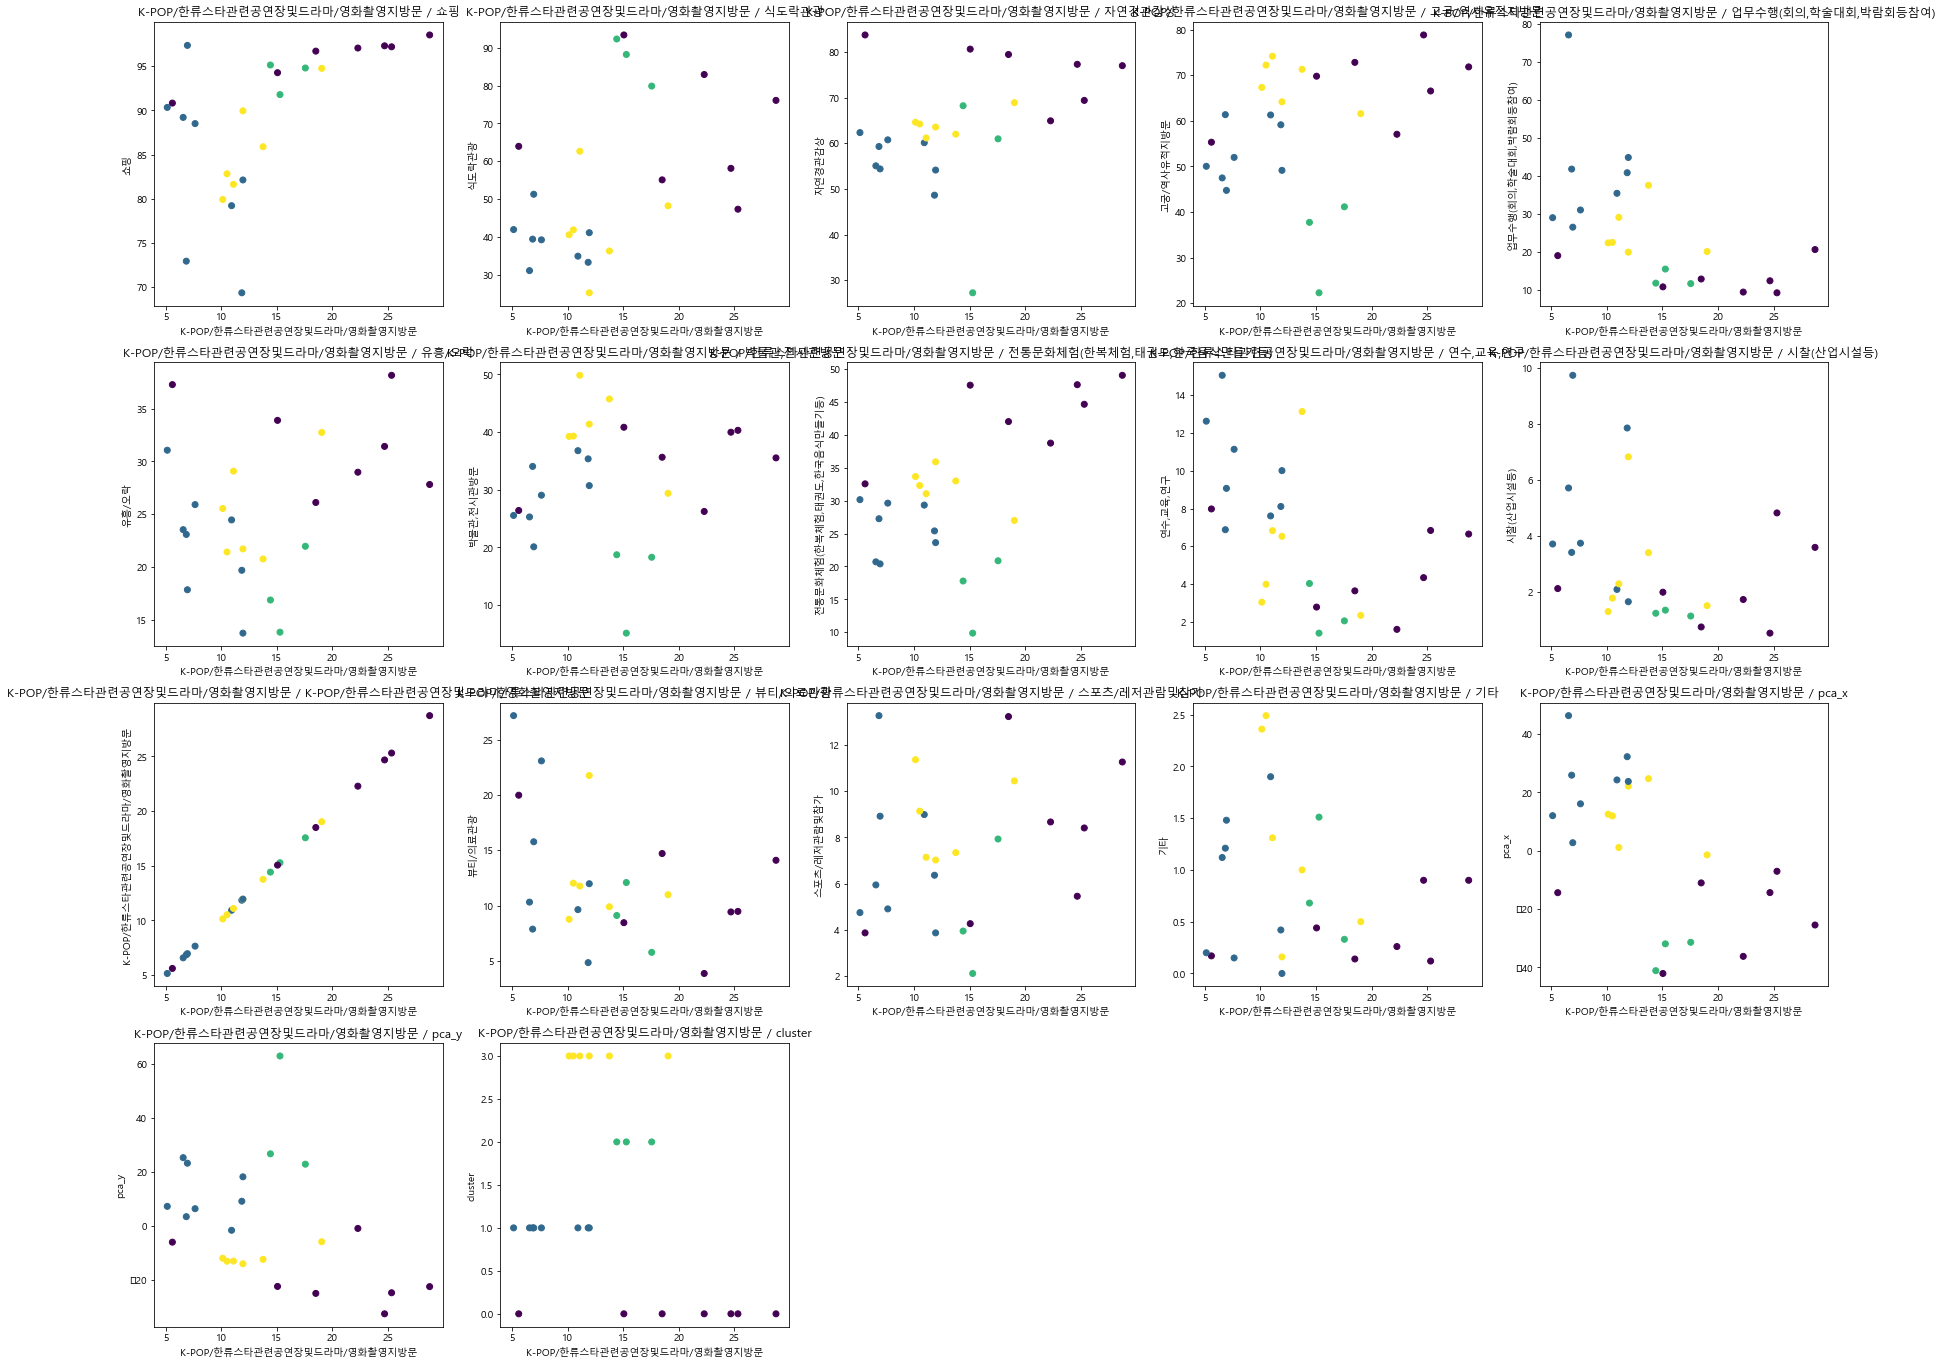

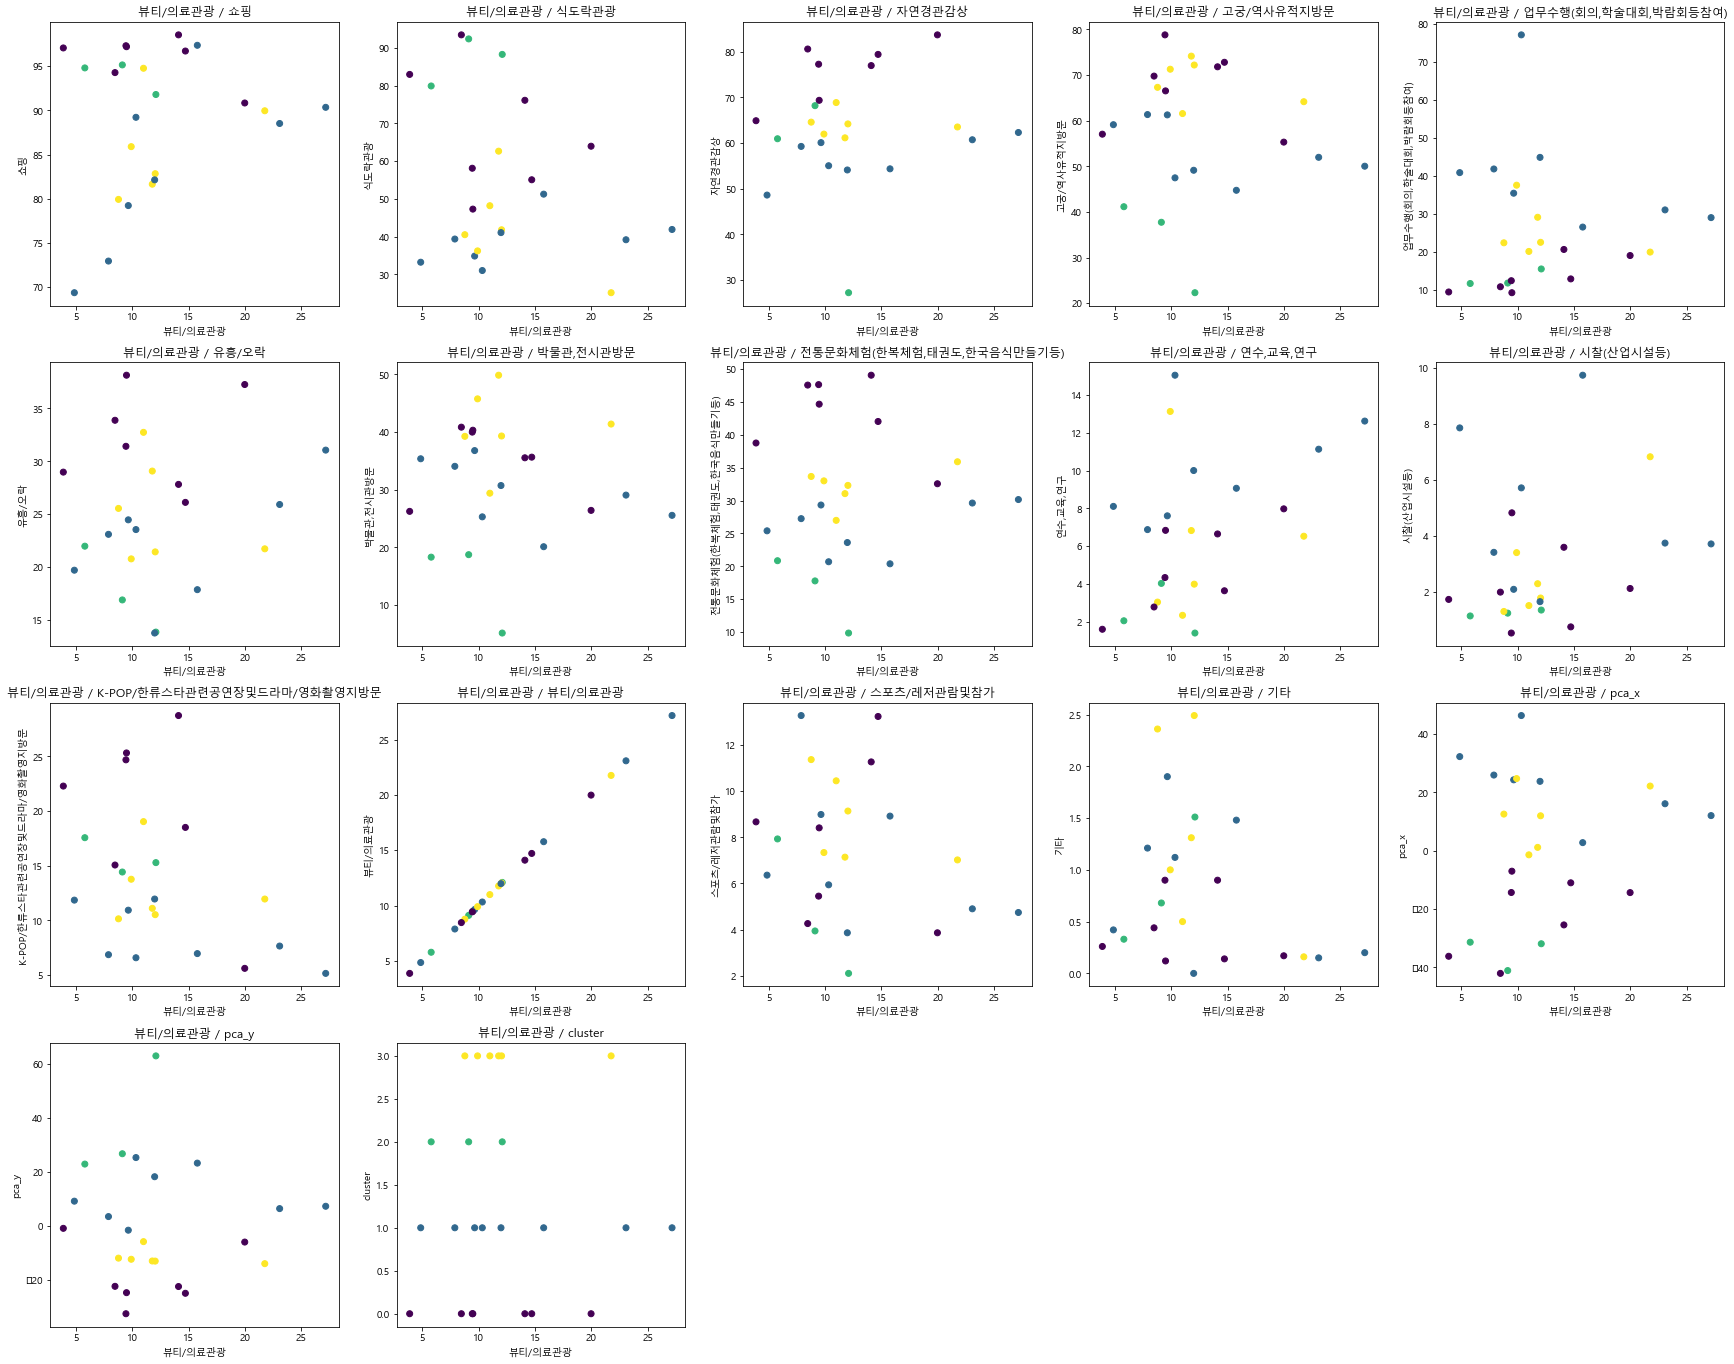

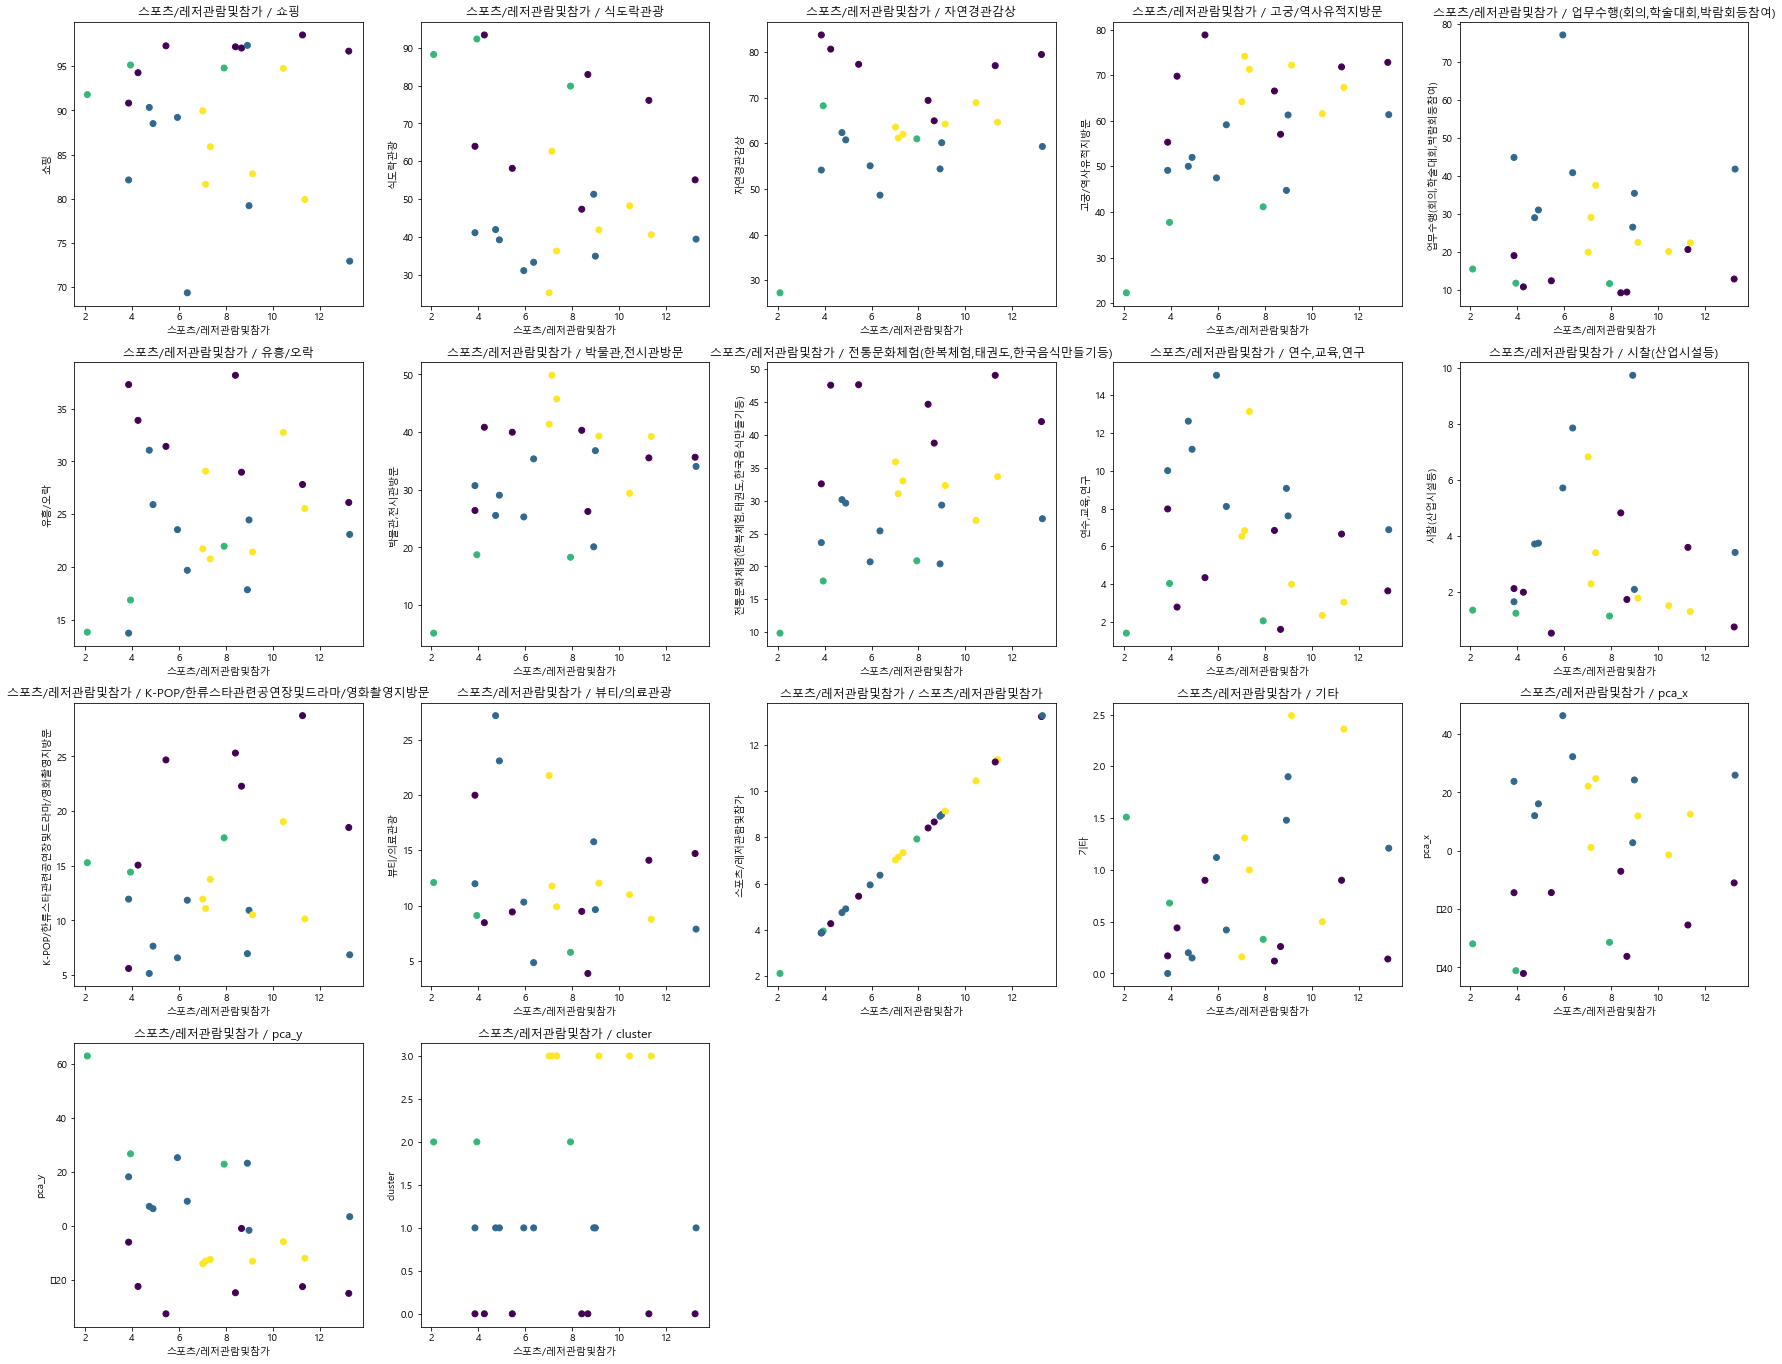

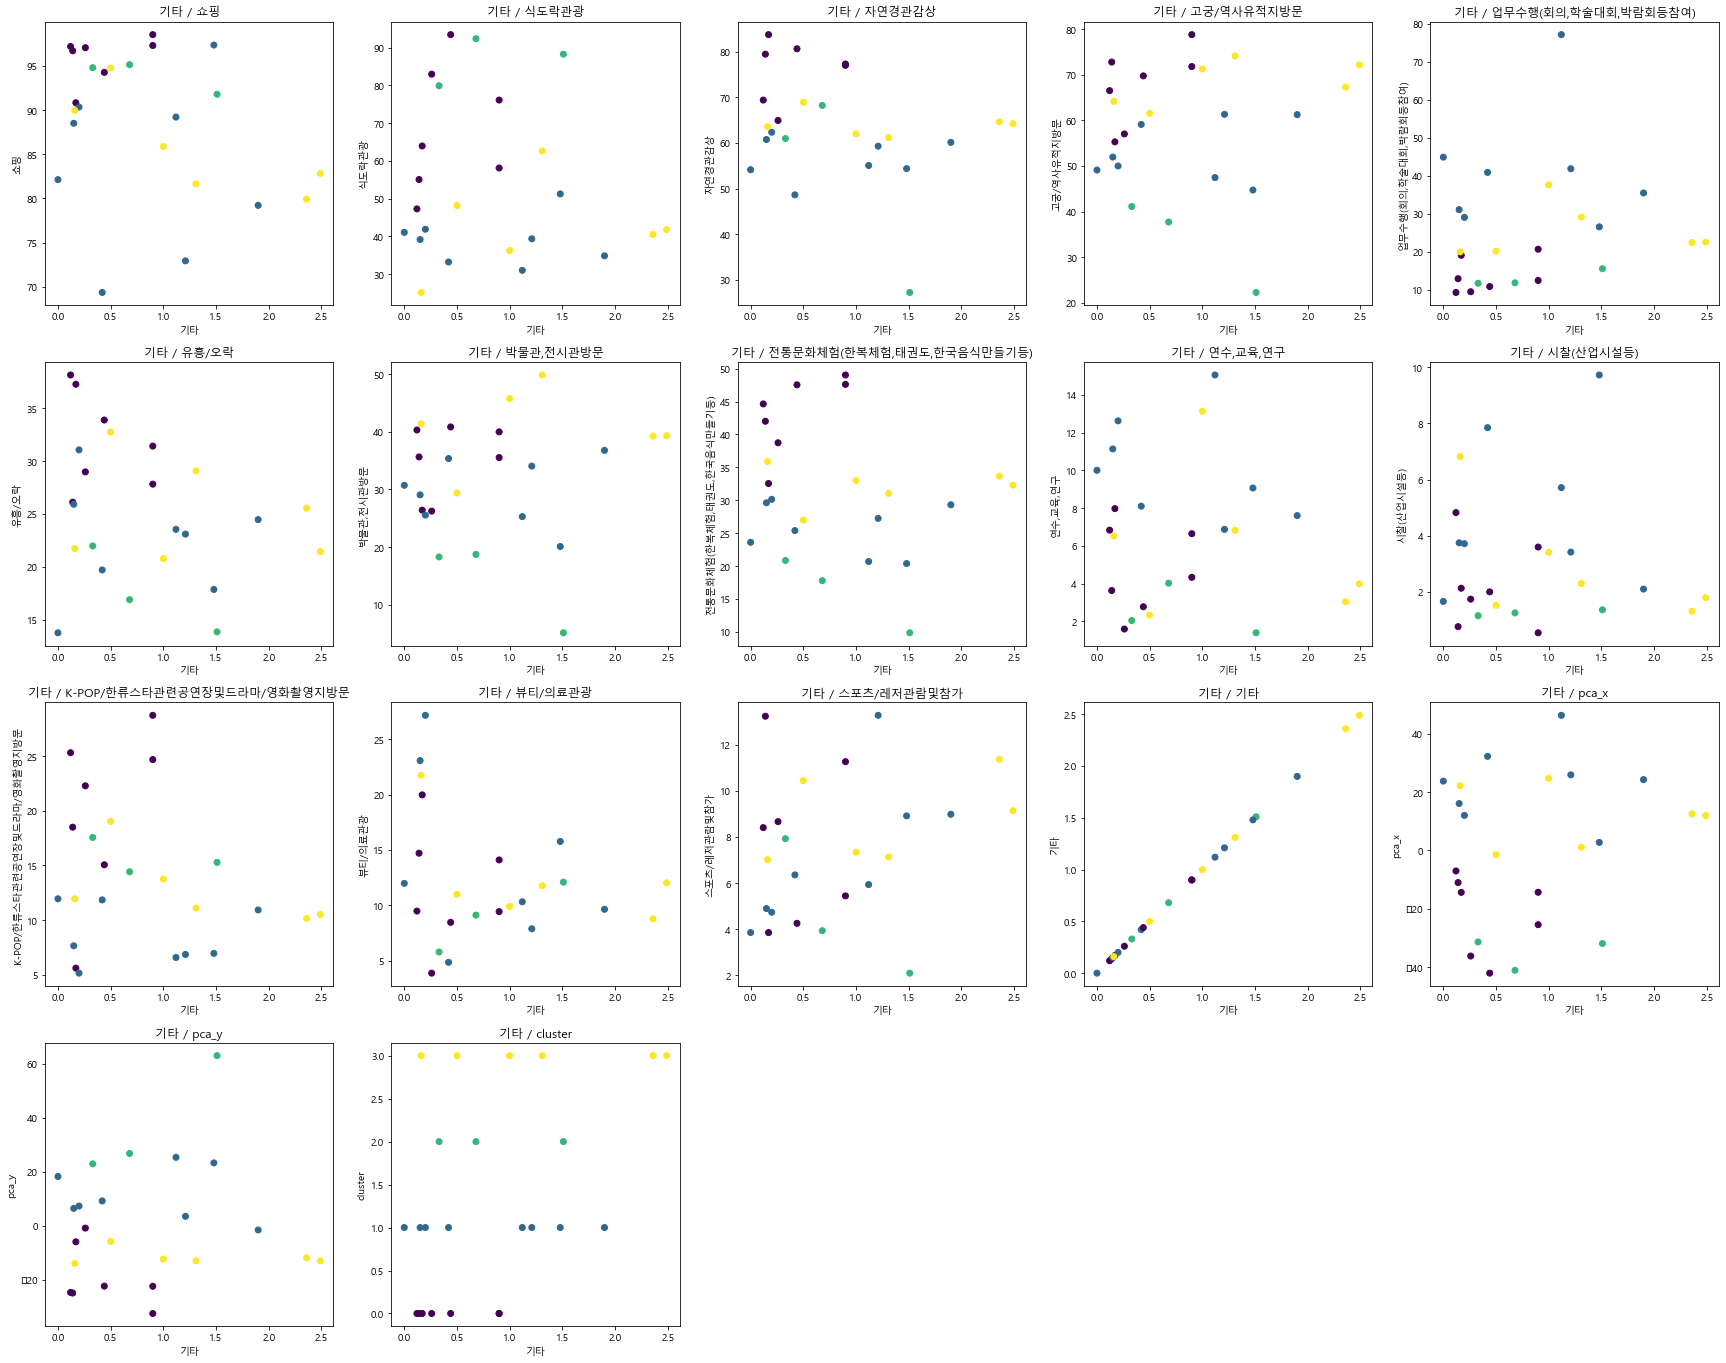

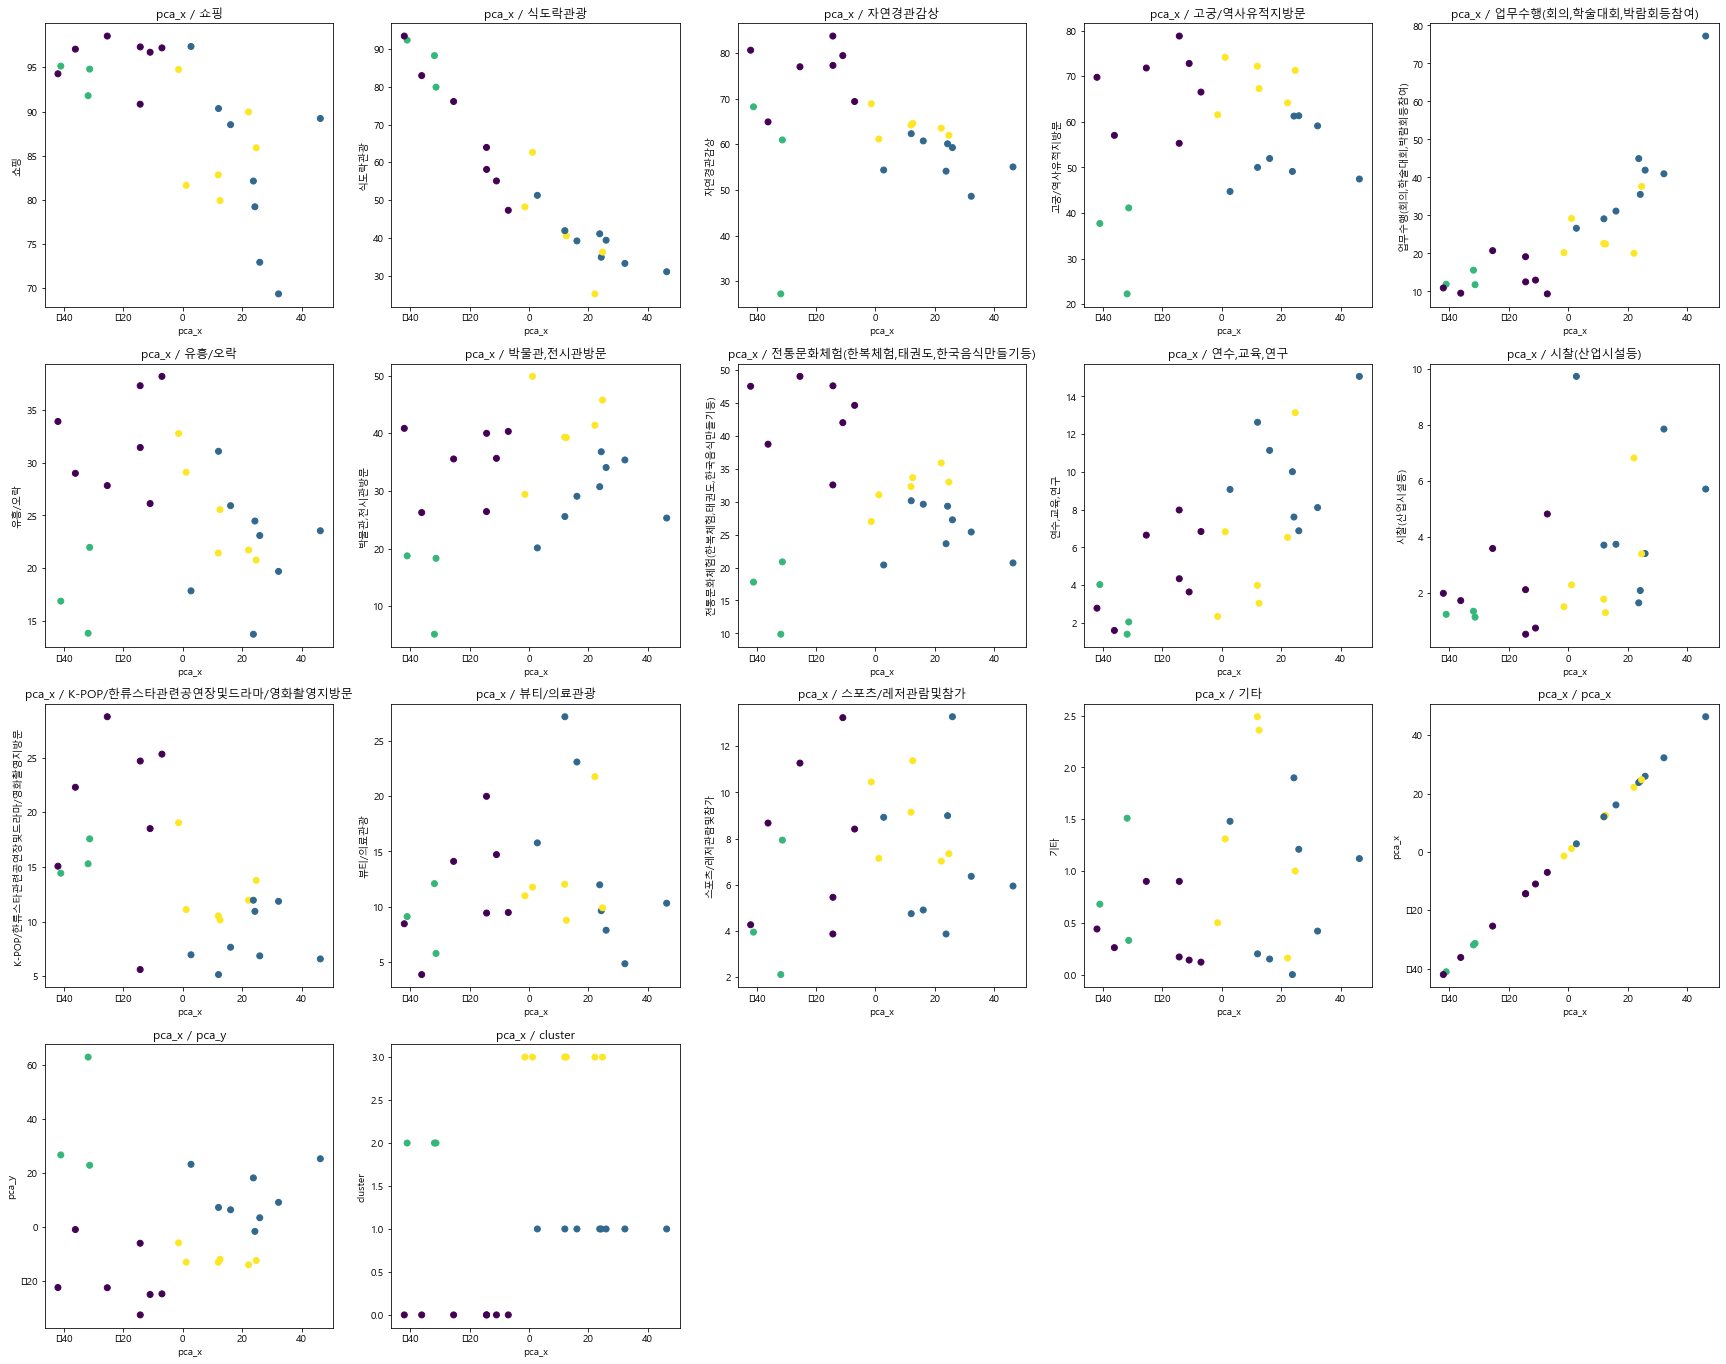

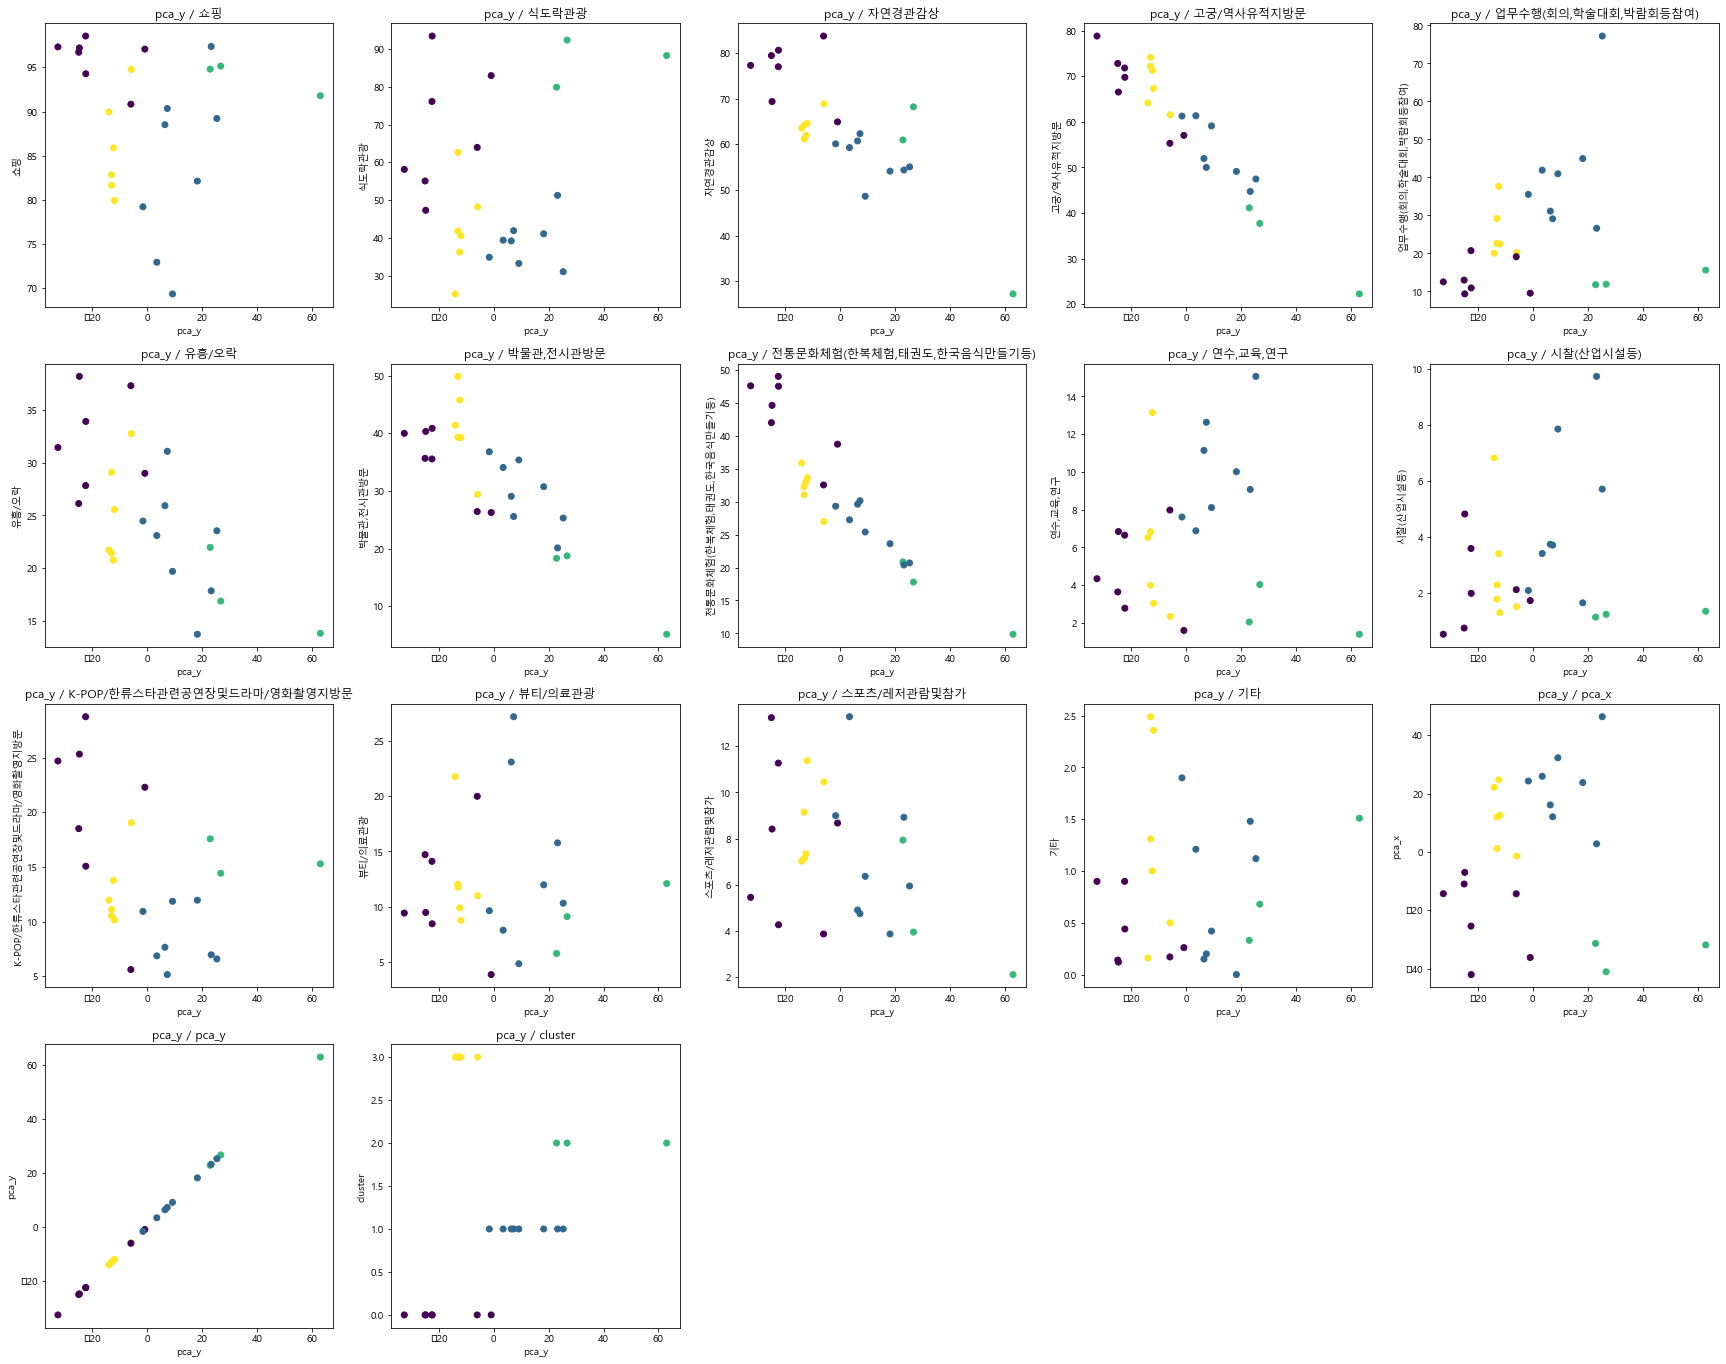

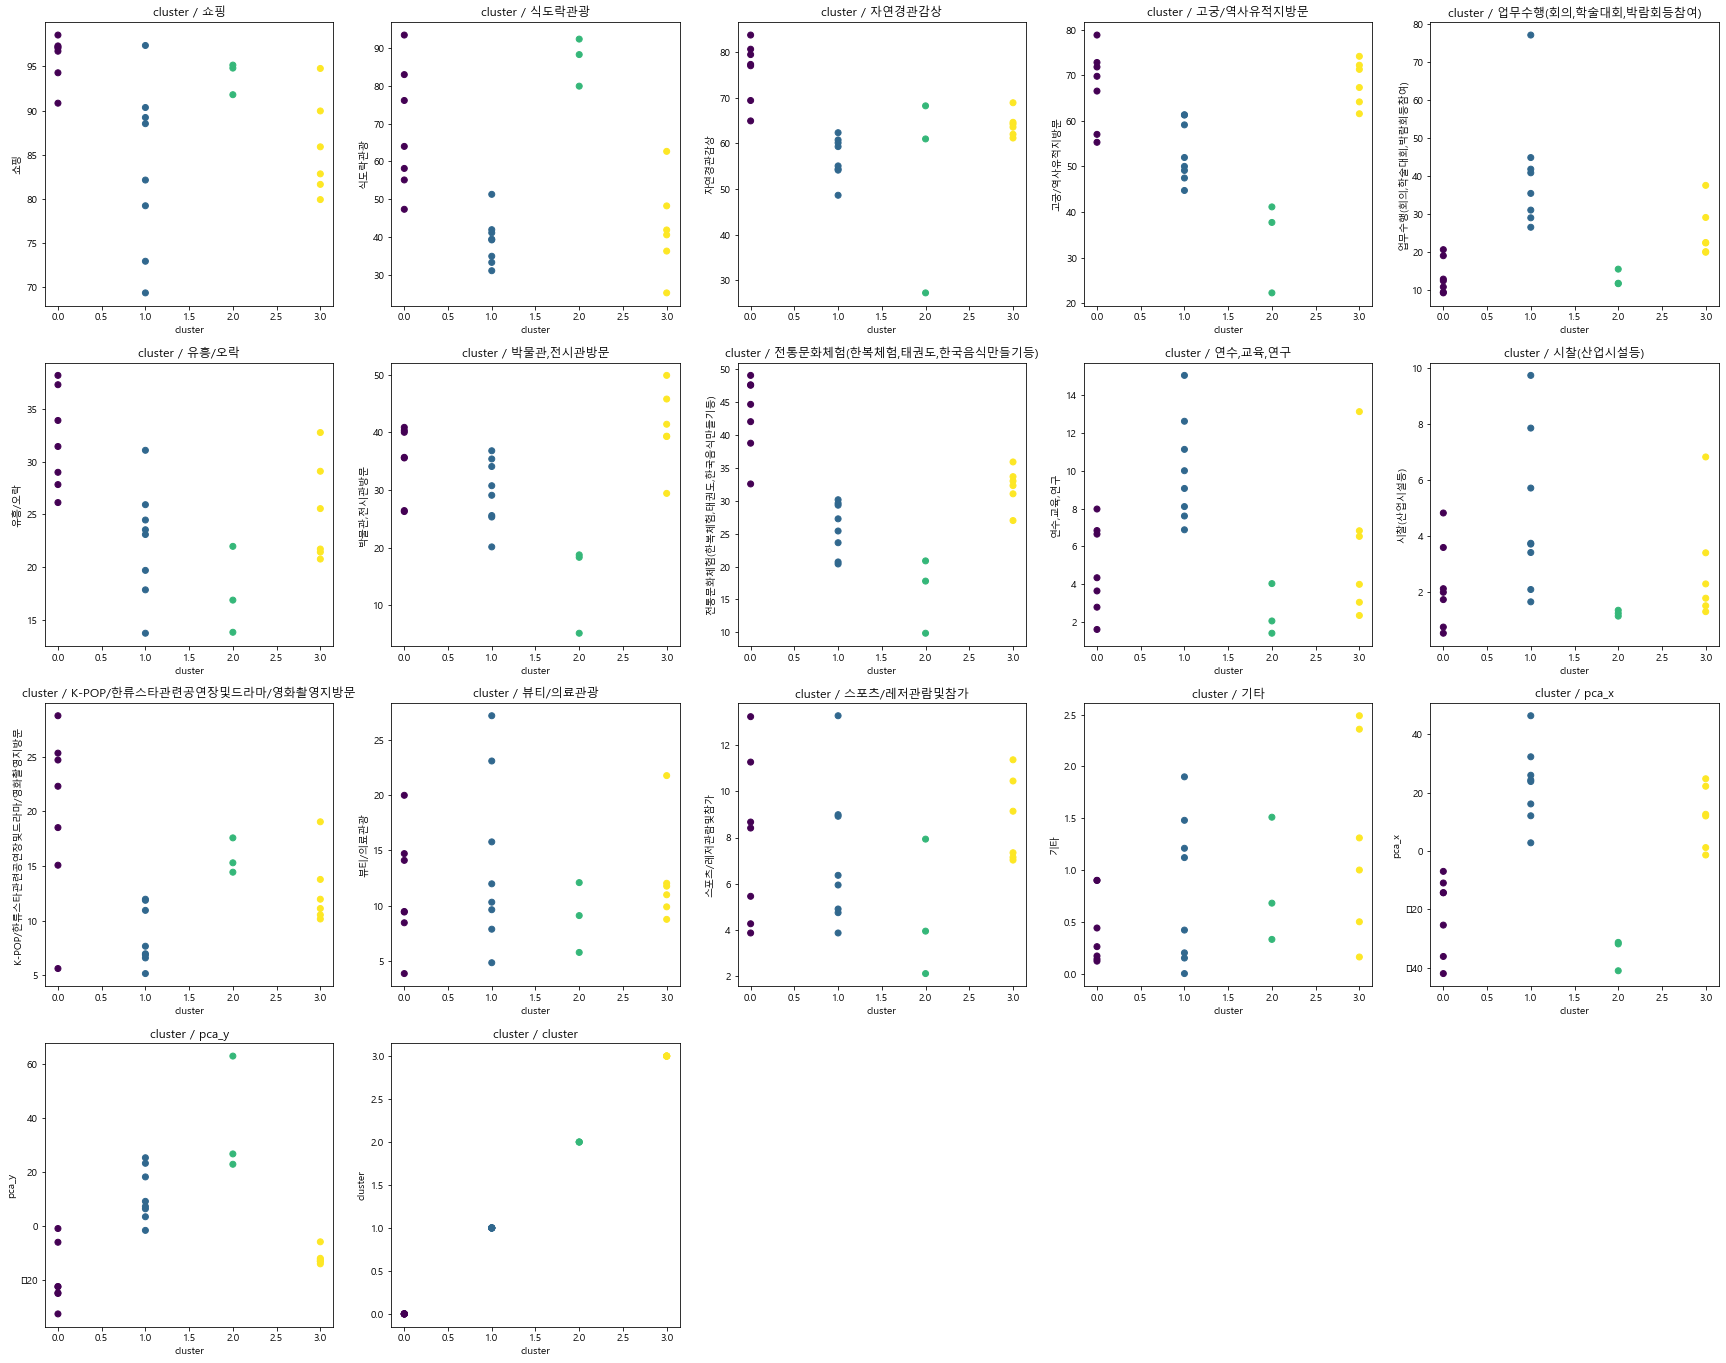

In [77]:
#### 모든 경우의 수로 그래프 그려보기 ####

columns = df.columns # 각 컬럼 리스트로 변경
col_len = len(columns) # 17

for col1 in columns:
    plt.figure(figsize=(30,24))
    cnt = 1
    for col2 in columns:
        plt.subplot(4, 5, cnt)
        plt.scatter(df[f'{col1}'], df[f'{col2}'], c=df['cluster'])
        plt.title(f'{col1} / {col2}')
        plt.xlabel(f'{col1}')
        plt.ylabel(f'{col2}')
        cnt += 1